# Credit Risk Analysis

## Introduction

Credit risk represents the potential for financial loss when borrowers fail to meet their debt obligations. It is a critical consideration for lenders, encompassing both borrower-specific factors and broader economic conditions. Credit risk is typically assessed and quantified using credit ratings provided by agencies such as FICO, S&P Global, Moody’s, and Fitch Ratings. These ratings help in determining the likelihood of default and the associated financial risks.

### Key Components of Credit Risk

**1. Expected Losses:** These are the losses that can be reasonably forecasted based on historical data and statistical models. They include:

- **Expected Credit Loss (ECL):** This is the anticipated amount that a lender might lose when lending to a borrower. It is calculated using the formula:
  $\text{ECL} = \text{PD} \times \text{LGD} \times \text{EAD}\$
  <br>where:
  - **PD (Probability of Default):** The likelihood that a borrower will default on their debt.
  - **LGD (Loss Given Default):** The proportion of the total exposure that cannot be recovered once a default occurs.
  - **EAD (Exposure at Default):** The total value that a lender is exposed to at the time of default.

**2. Unexpected Losses:** These losses arise from adverse economic conditions that are not predictable based on historical data.

**3. Exceptional (Stress) Losses:** These losses occur due to severe economic downturns and are generally considered extreme but plausible scenarios.

### Regulatory Framework and Capital Requirements

Banks are required to maintain sufficient capital to cover potential loan defaults, ensuring financial stability and solvency. The balance sheet of a bank must include risk-weighted assets and liabilities plus capital to meet regulatory capital requirements.

### Basel II Accord

The Basel II Accord provides a comprehensive framework for determining the capital requirements of banks. It consists of three pillars:

1. **Minimum Capital Requirements:** Specifies how much capital a bank needs to hold based on its risk-weighted assets.
2. **Supervisory Review:** Ensures that banks have sound internal processes in place to assess and manage their risks.
3. **Market Discipline:** Promotes transparency and requires banks to disclose their risk exposures and capital adequacy.

### Risk Weights and Credit Ratings

Credit ratings significantly influence the amount of capital that needs to be held against different types of exposures. Sovereign debts, for instance, are weighted according to the credit rating of the country, as provided by agencies like S&P Global. The risk-weight percentages vary depending on the type of borrower and the nature of the facility:

- **Retail Exposure:** 75% of each exposure.
- **Mortgage Exposure:** 35% of each exposure.

### Approaches to Risk Weighting

Banks can adopt different approaches to calculate the risk weights for their exposures:

1. **Standardized Approach (SA):** Utilizes external credit ratings to determine risk weights.
2. **Foundation Internal Ratings-Based (F-IRB) Approach:** Banks estimate PD, while other components like LGD and EAD are provided by regulators.
3. **Advanced Internal Ratings-Based (A-IRB) Approach:** Banks estimate PD, LGD, and EAD, providing greater flexibility and precision.

### Advantages of IRB Approaches

The IRB approaches, especially the Advanced IRB, offer several advantages, including better risk sensitivity and the ability to use internal models to more accurately assess risk components. This allows banks to hold capital that more closely aligns with their actual risk profiles, leading to more efficient capital allocation and enhanced risk management.

In summary, credit risk analysis is a multifaceted process involving the assessment of potential losses from borrowers' defaults, adherence to regulatory requirements, and the strategic management of capital. By leveraging both external credit ratings and internal risk models, banks can more effectively mitigate credit risk and ensure financial stability.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
loan_data_backup = pd.read_csv('loan_original.csv')

In [3]:
loan_data = loan_data_backup.copy()

In [4]:
pd.options.display.max_columns = None

In [5]:
loan_data.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   
2   15.96%        84.33     C        C5       NaN  10+ years           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11   Fully Paid          n   
1     30000.0     Source Verified  Dec-11  Charged Off          n   
2     12252.0        Not Verified  Dec-11   Fully Paid          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f        0.0            0.0  5863.155187          5833.84   
1                   f        0.0            0.0  1008.710000          1008.71   
2                   f        0.0            0.0  3005.666844          3005.67   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                 0.0        0.00   
1           456.46         435.17                 0.0      117.08   
2          2400.00         605.67                 0.0        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                     0.00       Jan-15           171.62          NaN   
1                     1.11       Apr-13           119.66          NaN   
2                     0.00       Jun-14           649.91          NaN   

  last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  \
0             May-16                         0.0                          NaN   
1             Sep-13                         0.0                          NaN   
2             May-16                         0.0                          NaN   

   policy_code application_type  annual_inc_joint  dti_joint  \
0            1       INDIVIDUAL               NaN        NaN   
1            1       INDIVIDUAL               NaN        NaN   
2            1       INDIVIDUAL               NaN        NaN   

   verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                        NaN               0           NaN          NaN   
1                        NaN               0           NaN          NaN   
2                        NaN              

In [6]:
loan_data.tail(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade         emp_title emp_length  \
39714    8.07%       156.84     A        A4               NaN   < 1 year   
39715    7.43%       155.38     A        A2               NaN   < 1 year   
39716   13.75%       255.43     E        E2  Evergreen Center   < 1 year   

      home_ownership  annual_inc verification_status issue_d loan_status  \
39714       MORTGAGE    100000.0        Not Verified  Jul-07  Fully Paid   
39715       MORTGAGE    200000.0        Not Verified  Jul-07  Fully Paid   
39716            OWN     22000.0        Not Verified  Jun-07  Fully Paid   

      pymnt_plan                                                url  \
39714          n  https://lendingclub.com/browse/loanDetail.acti...   
39715          n  https://lendingclub.com/browse/loanDetail.acti...   
39716          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                        title zip_code addr_state    dti  delinq_2yrs  \
39714  MBA Loan Consolidation    017xx         MA   2.30            0   
39715                JAL Loan    208xx         MD   3.72            0   
39716      Consolidation Loan    027xx         MA  14.29            1   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
39714           Oct-98               0                     0.0   
39715           Nov-88               0                     0.0   
39716           Oct-03               0                    11.0   

       mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
39714                     0.0        11        0       9698     19.40%   
39715                     0.0        17        0      85607      0.70%   
39716                     0.0         7        0       4175     51.50%   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
39714         20                   f        0.0            0.0  5272.161128   
39715         26                   f        0.0            0.0  5174.198551   
39716          8                   f        0.0            0.0  9195.263334   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
39714          1397.12           5000.0         272.16                 0.0   
39715           672.66           5000.0         174.20                 0.0   
39716           980.83           7500.0        1695.26                 0.0   

       recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
39714         0.0                      0.0       Apr-08             0.00   
39715         0.0                      0.0       Jan-08             0.00   
39716         0.0                      0.0       Jun-10           256.59   

      next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
39714          NaN             Jun-07                         NaN   
39715          NaN             Jun-07                         NaN   
39716          NaN             Jun-10                         NaN   

       mths_since_last_major_derog  policy_code application_type  \
39714                          NaN            1       INDIVIDUAL   
39715                          NaN            1       INDIVIDUAL   
39716                          NaN            1       INDIVIDUAL   

       annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  \
39714               NaN        NaN                  

In [7]:
loan_data.dtypes.value_counts()

float64    74
object     24
int64      13
Name: count, dtype: int64

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [9]:
loan_data.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

We can observe that :
- There are 111 columns in the dataset.
- There are 39717 data points.
- There are 3 data types which can be observed in the columns of the of the dataset: 
  - float64 : 74
  - object : 24
  - int64 : 13

## Preprocessing

#### Removing columns with all null values

In [10]:
all_null_columns = loan_data.columns[loan_data.isnull().all()].tolist()
len(all_null_columns)

54

In [11]:
loan_no_null = loan_data.copy()
loan_no_null.drop(columns=all_null_columns, inplace=True)
loan_no_null.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   
2   15.96%        84.33     C        C5       NaN  10+ years           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11   Fully Paid          n   
1     30000.0     Source Verified  Dec-11  Charged Off          n   
2     12252.0        Not Verified  Dec-11   Fully Paid          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f        0.0            0.0  5863.155187          5833.84   
1                   f        0.0            0.0  1008.710000          1008.71   
2                   f        0.0            0.0  3005.666844          3005.67   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                 0.0        0.00   
1           456.46         435.17                 0.0      117.08   
2          2400.00         605.67                 0.0        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
0                     0.00       Jan-15           171.62          NaN   
1                     1.11       Apr-13           119.66          NaN   
2                     0.00       Jun-14           649.91          NaN   

  last_credit_pull_d  collections_12_mths_ex_med  policy_code  \
0             May-16                         0.0            1   
1             Sep-13                         0.0            1   
2             May-16                         0.0            1   

  application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0       INDIVIDUAL               0                       0.0            0   
1       INDIVIDUAL               0                       0.0            0   
2       INDIVIDUAL               0                       0.0            0   

   pub_rec_bankruptcies  tax_liens  
0                   0.0        0.0  
1                   0.0        0.0  
2                   0.0        0.0

#### Calculating VIF for numeric columns in loan_no_null

**Variance Inflation Factor (VIF)** : VIF is a measure used in regression analysis to assess the multicollinearity of predictor variables in a model. Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated, making it difficult to determine the individual effect of each predictor variable on the dependent variable.
- Formula :  $VIF(X_i) = \frac{1}{1 - R_i^2}$
  - Where: $R_i^2$ is the $R^2$ value obtained by regressing $𝑋_𝑖^2$ against all other predictor variables.
- Interpretation
  - If the VIF value is close to 1, it indicates that there is no multicollinearity between the predictor variable $X_i$
  and the other predictor variables in the model.
  - If the VIF value is greater than 1, it suggests multicollinearity. Typically, a VIF value greater than 5 or 10 is considered problematic and may warrant further investigation.




In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    numeric_df = df.select_dtypes(include=[np.number])
    numeric_df = numeric_df.dropna(axis=1)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
    return vif_data

vif_result = calculate_vif(loan_no_null)
vif_result

Variable           VIF
0                        id  9.127510e+01
1                 member_id  9.446554e+01
2                 loan_amnt  2.843301e+01
3               funded_amnt  1.393450e+02
4           funded_amnt_inv  9.518454e+01
5               installment  1.727827e+01
6                annual_inc  1.222607e+00
7                       dti  1.208794e+00
8               delinq_2yrs  1.038748e+00
9            inq_last_6mths  1.038534e+00
10                 open_acc  1.993009e+00
11                  pub_rec  1.014970e+00
12                revol_bal  1.320833e+00
13                total_acc  2.106601e+00
14                out_prncp  2.923918e+03
15            out_prncp_inv  2.922966e+03
16              total_pymnt  1.177412e+13
17          total_pymnt_inv  1.322950e+02
18          total_rec_prncp  7.194249e+12
19            total_rec_int  9.798955e+11
20       total_rec_late_fee  7.655679e+06
21               recoveries  6.833472e+10
22  collection_recovery_fee  2.867740e+00
23          last_pymnt_amnt  1.814038e+00
24              policy_code  2.238929e+01
25           acc_now_delinq           NaN
26              delinq_amnt           NaN

We can utilize the following numerical attributes which have VIF values close to 1:
- annual_inc
- dti
- delinq_2yrs
- inq_last_6mths
- open_acc
- pub_rec
- revol_bal
- total_acc
- collection_recovery_fee
- last_pymnt_amnt

### Preprocessing date and time variables

In [13]:
loan_no_null['emp_length'].unique() 

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [14]:
type(loan_data['emp_length'][0])

str

#### Converting emp_length to numeric data type

This command directly discards all non-numeric parts

In [15]:
loan_no_null['emp_length_int'] = loan_no_null['emp_length'].str.replace(r'\D+', '', regex=True)

In [16]:
loan_no_null['emp_length_int'] = loan_no_null['emp_length_int'].fillna(0)

In [17]:
loan_no_null['emp_length_int'] = pd.to_numeric(loan_no_null['emp_length_int'])

In [18]:
type(loan_no_null['emp_length_int'][0])

numpy.int64

#### Converting earliest_cr_line to date

In [19]:
loan_no_null['earliest_cr_line']

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Jan-96
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 39717, dtype: object

In [20]:
loan_no_null['earliest_cr_line_date'] = pd.to_datetime(loan_no_null['earliest_cr_line'],format = '%b-%y')

In [21]:
type(loan_no_null['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### Creating derived column to extract months from earliest_cr_line_date

The reference date is taken as 01-04-2024

In [22]:
pd.to_datetime('2024-04-01') - loan_no_null['earliest_cr_line_date'] 

0       14335 days
1        9132 days
2        8187 days
3       10287 days
4       10318 days
           ...    
39712   12205 days
39713   13636 days
39714    9314 days
39715   12935 days
39716    7488 days
Name: earliest_cr_line_date, Length: 39717, dtype: timedelta64[ns]

In [23]:
loan_no_null['mnths_since_earliest_cr_line'] = round(
    (pd.to_datetime('2024-04-01') - loan_no_null['earliest_cr_line_date']).dt.days / 30.4375  # Approximate days in a month
)
loan_no_null['mnths_since_earliest_cr_line'].describe()

count    39717.000000
mean       323.658308
std         88.943032
min       -536.000000
25%        271.000000
50%        311.000000
75%        364.000000
max        662.000000
Name: mnths_since_earliest_cr_line, dtype: float64

#### Exploring distribution of mnths_since_earliest_cr_line

In [24]:
loan_no_null.loc[: , ['earliest_cr_line','earliest_cr_line_date','mnths_since_earliest_cr_line']][loan_no_null['mnths_since_earliest_cr_line']<0]

earliest_cr_line earliest_cr_line_date  mnths_since_earliest_cr_line
1576            Sep-62            2062-09-01                        -461.0
1764            Sep-68            2068-09-01                        -533.0
2792            Sep-64            2064-09-01                        -485.0
3274            Sep-67            2067-09-01                        -521.0
3349            Feb-65            2065-02-01                        -490.0
...                ...                   ...                           ...
37328           Oct-68            2068-10-01                        -534.0
37442           Sep-67            2067-09-01                        -521.0
38068           Dec-68            2068-12-01                        -536.0
39549           May-63            2063-05-01                        -469.0
39617           May-63            2063-05-01                        -469.0

[90 rows x 3 columns]

This removes negative values and replaces them with the max value in mnths_since_earliest_cr_line

In [25]:
loan_no_null['mnths_since_earliest_cr_line'][loan_no_null['mnths_since_earliest_cr_line'] < 0] = loan_no_null['mnths_since_earliest_cr_line'].max()

In [26]:
min(loan_no_null['mnths_since_earliest_cr_line'])

185.0

#### Conversion of other date and time variables

The derived columns are created for variables :
- term
- issue_d
- last_pymnt_d
- last_credit_pull_d

In [27]:
loan_no_null['term_int'] = loan_no_null['term'].str.replace(r'\D+', '', regex=True)

loan_no_null['issue_d'] = pd.to_datetime(loan_no_null['issue_d'],format = '%b-%y')
loan_no_null['last_pymnt_d'] = pd.to_datetime(loan_no_null['last_pymnt_d'],format = '%b-%y')
loan_no_null['last_credit_pull_d'] = pd.to_datetime(loan_no_null['last_credit_pull_d'],format = '%b-%y')

pd.to_datetime('2024-04-01') - loan_no_null['issue_d'] 
pd.to_datetime('2024-04-01') - loan_no_null['last_pymnt_d'] 
pd.to_datetime('2024-04-01') - loan_no_null['last_credit_pull_d'] 

loan_no_null['mnths_since_issue_d'] = round(
    (pd.to_datetime('2024-04-01') - loan_no_null['issue_d']).dt.days / 30.4375  # Approximate days in a month
)
loan_no_null['mnths_since_last_pymnt_d'] = round(
    (pd.to_datetime('2024-04-01') - loan_no_null['last_pymnt_d']).dt.days / 30.4375  # Approximate days in a month
)
loan_no_null['mnths_since_last_credit_pull_d'] = round(
    (pd.to_datetime('2024-04-01') - loan_no_null['last_credit_pull_d']).dt.days / 30.4375  # Approximate days in a month
)

In [28]:
loan_no_null['mnths_since_last_credit_pull_d'].describe()

count    39715.000000
mean       114.761627
std         20.799934
min         95.000000
25%         95.000000
50%        109.000000
75%        130.000000
max        203.000000
Name: mnths_since_last_credit_pull_d, dtype: float64

- Checked for all newly created date variables, there are no negative values so the step to put max value is skipped. 

### Preprocessing discrete variables

In [29]:
loan_no_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              39717 non-null  int64         
 1   member_id                       39717 non-null  int64         
 2   loan_amnt                       39717 non-null  int64         
 3   funded_amnt                     39717 non-null  int64         
 4   funded_amnt_inv                 39717 non-null  float64       
 5   term                            39717 non-null  object        
 6   int_rate                        39717 non-null  object        
 7   installment                     39717 non-null  float64       
 8   grade                           39717 non-null  object        
 9   sub_grade                       39717 non-null  object        
 10  emp_title                       37258 non-null  object        
 11  em

#### Getting dummy variables for selected categorical/discrete variables and storing them in a new dataframe

In [30]:
loan_data_dummies = [ pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ' : '),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ' : '),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ' : '),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ' : '),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ' : '),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ' : '),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ' : '),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ' : ')]

#### Concatenating the dummy variables with the original dataframe

In [31]:
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)

In [32]:
loan_no_null = pd.concat([loan_no_null,loan_data_dummies] , axis=1)

In [33]:
loan_no_null.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_

In [34]:
loan_data_clean = loan_no_null.copy()

In [35]:
loan_data_clean.to_csv('LoanDataPreprocessed.csv')

## PD Model

**Introduction to Probability of Default (PD) Model**
<br>In the context of credit risk analysis, banks and financial institutions use various models to assess the likelihood that a borrower will default on a loan. One such model is the Probability of Default (PD) model. This model estimates the probability that a borrower will be unable to meet their debt obligations. The PD model is a crucial component in the calculation of expected loss and helps in the effective management of credit risk.

- **Probability of Default (PD) :** PD represents the likelihood that a borrower will default on their loan obligations within a specified time frame. This probability is a critical input for calculating the expected loss and for setting aside capital reserves to cover potential losses.

### Data Preparation

In [36]:
value_counts = loan_data_clean['loan_status'].value_counts()
value_counts

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [37]:
loan_data_clean['loan_status'].value_counts() / loan_data_clean['loan_status'].count()

loan_status
Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: count, dtype: float64

- The categories **'Fully Paid'** and **'Current'** fall under **non-default**, so they will be considered **good** and mapped as **1**.
- The category **'Current'** will fall under default category, so it will be considered **bad** and mapped as **0**.

#### Creating dependent variable : good_bad 

In [38]:
loan_data_clean['good_bad'] = np.where(loan_data_clean['loan_status'].isin(['Charged Off']),0,1)

In [39]:
loan_data_clean['good_bad']

0        1
1        0
2        1
3        1
4        1
        ..
39712    1
39713    1
39714    1
39715    1
39716    1
Name: good_bad, Length: 39717, dtype: int32

### Splitting data

In [40]:
from sklearn.model_selection import train_test_split

##### Creating inputs_train, inputs_test, targets_train, targets_test
- Setting test_size to 0.2 creates a 80/20 split.
- Setting random state will ensure same split is used each time.

In [41]:
loan_data_inputs_train,loan_data_inputs_test,loan_data_targets_train,loan_data_targets_test = train_test_split(loan_data_clean.drop('good_bad',axis=1), loan_data_clean['good_bad'], test_size = 0.2,random_state = 42 )

In [42]:
loan_data_inputs_train.shape

(31773, 182)

In [43]:
loan_data_inputs_test.shape

(7944, 182)

In [44]:
loan_data_targets_train.shape

(31773,)

In [45]:
loan_data_targets_test.shape

(7944,)

### Discrete Variables : Automating IV Calculation

**Information Value (IV)**
- Purpose : IV is used in predictive modeling, especially in credit scoring, to measure the predictive power of an independent variable in relation to a binary dependent variable. It helps in feature selection by quantifying the strength of a variable in separating good from bad outcomes (e.g., good vs. bad loans).
- Calculation: IV is calculated by dividing the range of the variable into bins and then comparing the distribution of the binary outcome across these bins.
  - For Information Value (IV):
    - $ IV = \sum \left( (\text{WOE}_i) \times (\text{Good\%}_i - \text{Bad\%}_i) \right)$ , where
  - WoE - Weight of evidence is :
    - $\text{WOE}_i = \ln \left( \frac{\text{Good\%}_i}{\text{Bad\%}_i} \right)$

- Interpretation:
  - IV < 0.02: Not predictive.
  - 0.02 ≤ IV < 0.1: Weak predictive power.
  - 0.1 ≤ IV < 0.3: Medium predictive power.
  - 0.3 ≤ IV < 0.5: Strong predictive power.
  - IV ≥ 0.5: Very strong predictive power, possibly too good (could indicate overfitting).

In [46]:
#df_inputs_prep = loan_data_inputs_train
#df_targets_prep = loan_data_targets_train
df_inputs_prep = loan_data_inputs_test
df_targets_prep = loan_data_targets_test

#### Function to calculate IV and WoE for columns

In [47]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()], axis =1 )
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = ( df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
    

### Discrete Variables : Visualization

**Converting Discrete Variables to Categorical Data :**
To effectively use discrete variables in a machine learning model, they can be converted into categorical data and subsequently used as dummy variables.
- Assess the Number of Unique Values:
    - If the number of unique values is manageable, each value can be treated as a category.
    - If there are too many unique values, consider forming sub-categories.
- Form Sub-Categories:
    - Group similar values into broader categories to reduce the number of unique values.
- Convert to Dummy Variables:
    - Use one-hot encoding to convert categorical data into dummy variables. Each category becomes a binary variable.

##### Function to visualize WoE

**Categorizing Based on Weight of Evidence (WoE)**
- Steps to Plot WoE and Categorize :
    - Calculate WoE : For each category, calculate the WoE.
    - Plot WoE : Create a plot of WoE values for each category. This helps visualize the relationship between categories and the target variable.
- Categorize Based on WoE:
    - Similar Weights with Not Much Variation in Observations: If categories have similar WoE values, they can be combined into a single category.
    - High Number of Observations: If a category has a significantly higher number of observations, it might warrant being a separate category to capture its unique predictive power.

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [49]:
def plot_by_woe(df_woe,rotation_of_x_axis_labels=  0):
    x = np.array(df_woe.iloc[:,0].apply(str))
    y = df_woe['WoE']
    plt.figure(figsize = (18,6))
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by '+ df_woe.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

#### 1 . Processing discrete variable : grade

In [50]:
df_temp = woe_discrete(df_inputs_prep,'grade',df_targets_prep)
df_temp

grade  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0     F    210   0.661905    0.026435   139.0   71.0     0.020292    0.064899   
1     G     56   0.678571    0.007049    38.0   18.0     0.005547    0.016453   
2     E    556   0.744604    0.069990   414.0  142.0     0.060438    0.129799   
3     D   1081   0.803885    0.136078   869.0  212.0     0.126861    0.193784   
4     C   1672   0.832536    0.210473  1392.0  280.0     0.203212    0.255941   
5     B   2322   0.886736    0.292296  2059.0  263.0     0.300584    0.240402   
6     A   2047   0.947240    0.257679  1939.0  108.0     0.283066    0.098720   

        WoE  diff_prop_good  diff_WoE        IV  
0 -1.162614             NaN       NaN  0.364885  
1 -1.087194        0.016667  0.075420  0.364885  
2 -0.764369        0.066033  0.322825  0.364885  
3 -0.423651        0.059281  0.340718  0.364885  
4 -0.230701        0.028651  0.192950  0.364885  
5  0.223414        0.054200  0.454114  0.364885  
6  1.053388        0.060504  0.829975  0.364885

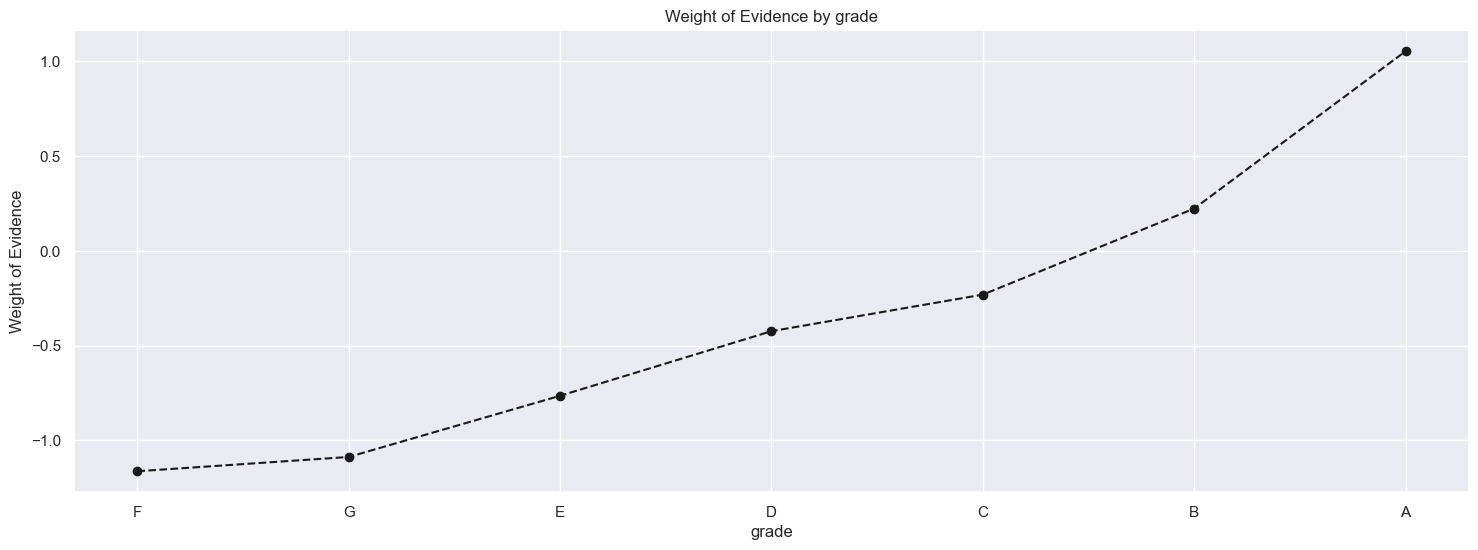

In [51]:
plot_by_woe(df_temp)

In [52]:
df_inputs_prep['grade : A'] = df_inputs_prep['grade : A'].map({True: 1, False: 0})
df_inputs_prep['grade : B'] = df_inputs_prep['grade : B'].map({True: 1, False: 0})
df_inputs_prep['grade : C'] = df_inputs_prep['grade : C'].map({True: 1, False: 0})
df_inputs_prep['grade : D'] = df_inputs_prep['grade : D'].map({True: 1, False: 0})
df_inputs_prep['grade : E'] = df_inputs_prep['grade : E'].map({True: 1, False: 0})
df_inputs_prep['grade : F'] = df_inputs_prep['grade : F'].map({True: 1, False: 0})
df_inputs_prep['grade : G'] = df_inputs_prep['grade : G'].map({True: 1, False: 0})

In [53]:
df_temp = woe_discrete(df_inputs_prep,'sub_grade',df_targets_prep)
df_temp

sub_grade  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0         G3      6   0.333333    0.000755     2.0    4.0     0.000292   
1         F5     26   0.576923    0.003273    15.0   11.0     0.002190   
2         G2     12   0.583333    0.001511     7.0    5.0     0.001022   
3         F2     40   0.625000    0.005035    25.0   15.0     0.003650   
4         F1     76   0.631579    0.009567    48.0   28.0     0.007007   
5         F4     37   0.702703    0.004658    26.0   11.0     0.003796   
6         E5     78   0.705128    0.009819    55.0   23.0     0.008029   
7         G1     24   0.708333    0.003021    17.0    7.0     0.002482   
8         E1    152   0.710526    0.019134   108.0   44.0     0.015766   
9         E2    135   0.748148    0.016994   101.0   34.0     0.014745   
10        E4     86   0.755814    0.010826    65.0   21.0     0.009489   
11        D5    184   0.766304    0.023162   141.0   43.0     0.020584   
12        D3    228   0.776316    0.028701   177.0   51.0     0.025839   
13        G4     10   0.800000    0.001259     8.0    2.0     0.001168   
14        F3     31   0.806452    0.003902    25.0    6.0     0.003650   
15        C4    239   0.807531    0.030086   193.0   46.0     0.028175   
16        E3    105   0.809524    0.013218    85.0   20.0     0.012409   
17        D4    211   0.810427    0.026561   171.0   40.0     0.024964   
18        C5    254   0.811024    0.031974   206.0   48.0     0.030073   
19        D1    193   0.818653    0.024295   158.0   35.0     0.023066   
20        C2    391   0.828645    0.049220   324.0   67.0     0.047299   
21        C3    327   0.834862    0.041163   273.0   54.0     0.039854   
22        D2    265   0.837736    0.033359   222.0   43.0     0.032409   
23        C1    461   0.859002    0.058031   396.0   65.0     0.057810   
24        B5    520   0.876923    0.065458   456.0   64.0     0.066569   
25        B2    390   0.879487    0.049094   343.0   47.0     0.050073   
26        B3    611   0.887070    0.076913   542.0   69.0     0.079124   
27        B4    463   0.889849    0.058283   412.0   51.0     0.060146   
28        B1    338   0.905325    0.042548   306.0   32.0     0.044672   
29        A5    584   0.919521    0.073515   537.0   47.0     0.078394   
30        A4    587   0.950596    0.073892   558.0   29.0     0.081460   
31        A3    378   0.960317    0.047583   363.0   15.0     0.052993   
32        A1    221   0.963801    0.027820   213.0    8.0     0.031095   
33        A2    277   0.967509    0.034869   268.0    9.0     0.039124   
34        G5      4   1.000000    0.000504     4.0    0.0     0.000584   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.003656 -2.527555             NaN       NaN  inf  
1     0.010055 -1.524253        0.243590  1.003302  inf  
2     0.004570 -1.497936        0.006410  0.026317  inf  
3     0.013711 -1.323582        0.041667  0.174353  inf  
4     0.025594 -1.295411        0.006579  0.028171  inf  
5     0.010055 -0.974207        0.071124  0.321205  inf  
6     0.021024 -0.962569        0.002426  0.011638  inf  
7     0.006399 -0.947105        0.003205  0.015464  inf  
8     0.040219 -0.936466        0.002193  0.010638  inf  
9     0.031079 -0.745648        0.037622  0.190818  inf  
10    0.019196 -0.704543        0.007666  0.041105  inf  
11    0.039305 -0.646848        0.010490  0.057695  inf  
12    0.046618 -0.590084        0.010011  0.056764  inf  
13    0.001828 -0.448114        0.023684  0.141970  inf  
14    0.005484 -0.407292        0.006452  0.040822  inf  
15    0.042048 -0.400359        0.001080  0.006932  inf  
16    0.018282 -0.387489        0.001992  0.012870  inf  
17    0.036563 -0.381624        0.000903  0.005865  inf  
18    0.043876 -0.377733        0.000597  0.003891  inf  
19    0.031993 -0.327161        0.007629  0.050572  inf  
20    0.061243 -0.258357        0.009992  0.068804  inf  
21    0.049360 -0.213920        0.006218  0.044437  inf  
22  

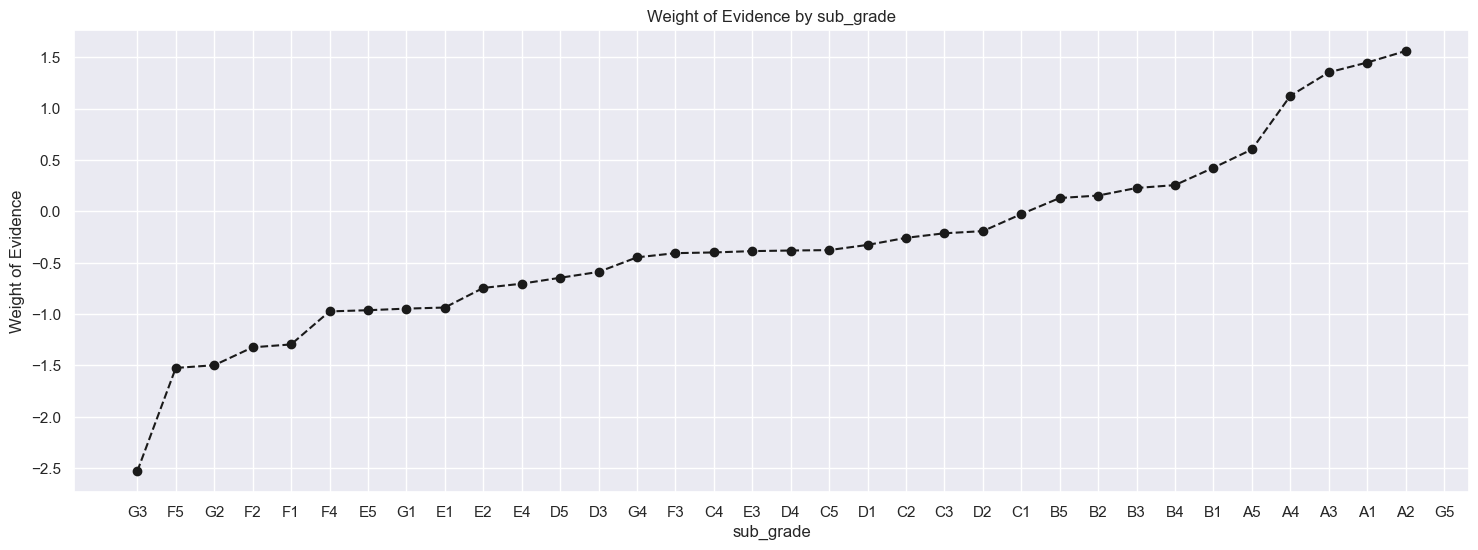

In [54]:
plot_by_woe(df_temp)

#### 2 . Processing discrete variable : home_ownership

In [55]:
df_temp = woe_discrete(df_inputs_prep,'home_ownership',df_targets_prep)
df_temp

home_ownership  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0           RENT   3805   0.848357    0.478978  3228.0  577.0     0.471241   
1            OWN    621   0.851852    0.078172   529.0   92.0     0.077226   
2       MORTGAGE   3499   0.879108    0.440458  3076.0  423.0     0.449051   
3          OTHER     17   0.882353    0.002140    15.0    2.0     0.002190   
4           NONE      2   1.000000    0.000252     2.0    0.0     0.000292   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.527422 -0.112632             NaN       NaN  inf  
1    0.084095 -0.085208        0.003494  0.027424  inf  
2    0.386654  0.149605        0.027256  0.234813  inf  
3    0.001828  0.180495        0.003245  0.030890  inf  
4    0.000000       inf        0.117647       inf  inf

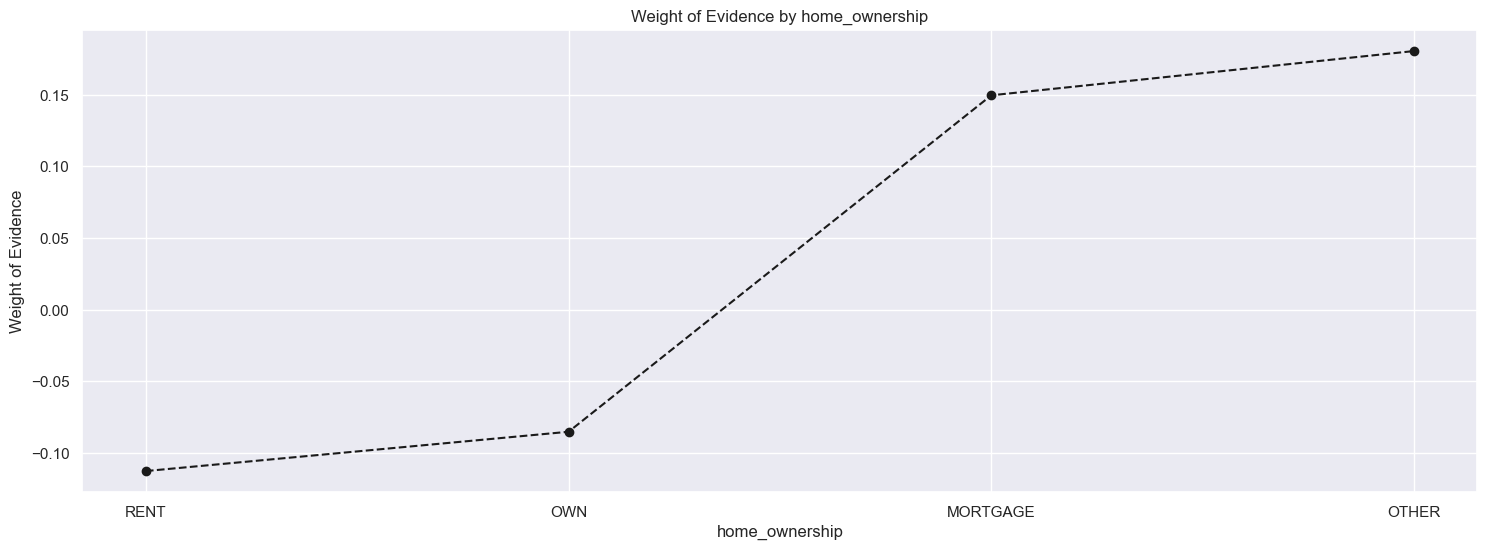

In [56]:
plot_by_woe(df_temp)

In [57]:
df_inputs_prep['home_ownership : OWN_OTHER_NONE'] = sum([df_inputs_prep['home_ownership : OWN'],df_inputs_prep['home_ownership : OTHER'],df_inputs_prep['home_ownership : NONE']])
df_inputs_prep['home_ownership : MORTGAGE'] = df_inputs_prep['home_ownership : MORTGAGE'].map({True: 1, False: 0})
df_inputs_prep['home_ownership : RENT'] = df_inputs_prep['home_ownership : RENT'].map({True: 1, False: 0})

#### 3 . Processing discrete variable : addr_state

In [58]:
df_temp = woe_discrete(df_inputs_prep, 'addr_state' , df_targets_prep)
df_temp

addr_state  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0          NE      2   0.000000    0.000252     0.0    2.0     0.000000   
1          AK     15   0.666667    0.001888    10.0    5.0     0.001460   
2          TN      3   0.666667    0.000378     2.0    1.0     0.000292   
3          NV     96   0.802083    0.012085    77.0   19.0     0.011241   
4          OR     95   0.821053    0.011959    78.0   17.0     0.011387   
5          FL    582   0.821306    0.073263   478.0  104.0     0.069781   
6          WV     40   0.825000    0.005035    33.0    7.0     0.004818   
7          OK     61   0.836066    0.007679    51.0   10.0     0.007445   
8          MN    130   0.838462    0.016365   109.0   21.0     0.015912   
9          WI     93   0.838710    0.011707    78.0   15.0     0.011387   
10         GA    286   0.839161    0.036002   240.0   46.0     0.035036   
11         HI     25   0.840000    0.003147    21.0    4.0     0.003066   
12         NJ    379   0.844327    0.047709   320.0   59.0     0.046715   
13         KY     65   0.846154    0.008182    55.0   10.0     0.008029   
14         MD    224   0.848214    0.028197   190.0   34.0     0.027737   
15         UT     53   0.849057    0.006672    45.0    8.0     0.006569   
16         SC    100   0.850000    0.012588    85.0   15.0     0.012409   
17         CA   1406   0.851351    0.176989  1197.0  209.0     0.174745   
18         NC    159   0.855346    0.020015   136.0   23.0     0.019854   
19         NY    742   0.859838    0.093404   638.0  104.0     0.093139   
20         MO    132   0.863636    0.016616   114.0   18.0     0.016642   
21         MI    141   0.865248    0.017749   122.0   19.0     0.017810   
22         CO    172   0.866279    0.021652   149.0   23.0     0.021752   
23         MT     15   0.866667    0.001888    13.0    2.0     0.001898   
24         NM     31   0.870968    0.003902    27.0    4.0     0.003942   
25         WA    165   0.872727    0.020770   144.0   21.0     0.021022   
26         VT      8   0.875000    0.001007     7.0    1.0     0.001022   
27         VA    288   0.875000    0.036254   252.0   36.0     0.036788   
28         DE     16   0.875000    0.002014    14.0    2.0     0.002044   
29         AR     50   0.880000    0.006294    44.0    6.0     0.006423   
30         IL    302   0.880795    0.038016   266.0   36.0     0.038832   
31         AL     78   0.884615    0.009819    69.0    9.0     0.010073   
32         LA     79   0.886076    0.009945    70.0    9.0     0.010219   
33         OH    246   0.890244    0.030967   219.0   27.0     0.031971   
34         TX    559   0.892665    0.070368   499.0   60.0     0.072847   
35         AZ    161   0.894410    0.020267   144.0   17.0     0.021022   
36         PA    306   0.895425    0.038520   274.0   32.0     0.040000   
37         RI     39   0.897436    0.004909    35.0    4.0     0.005109   
38         DC     39   0.897436    0.004909    35.0    4.0     0.005109   
39         CT    151   0.900662    0.019008   136.0   15.0     0.019854   
40         MA    291   0.907216    0.036631   264.0   27.0     0.038540   
41         KS     54   0.907407    0.006798    49.0    5.0     0.007153   
42         NH     34   0.911765    0.004280    31.0    3.0     0.004526   
43         WY     13   0.923077    0.001636    12.0    1.0     0.001752   
44         ME      1   1.000000    0.000126     1.0    0.0     0.000146   
45         IN      1   1.000000    0.000126     1.0    0.0     0.000146   
46         SD      9   1.000000    0.001133     9.0    0.0     0.001314   
47         MS      7   1.000000    0.000881     7.0    0.0     0.001022   

    prop_n_bad       WoE  diff_prop_good      diff_WoE   IV  
0     0.001828      -inf             NaN           NaN  inf  
1     0.004570 -1.141261        0.666667           inf  inf  
2     0.000914 -1.141261        0.000000  4.440892e-16  inf  
3     0.017367 -0.435042        0.135417  7.062193e-01  inf  
4     0.015539 -0

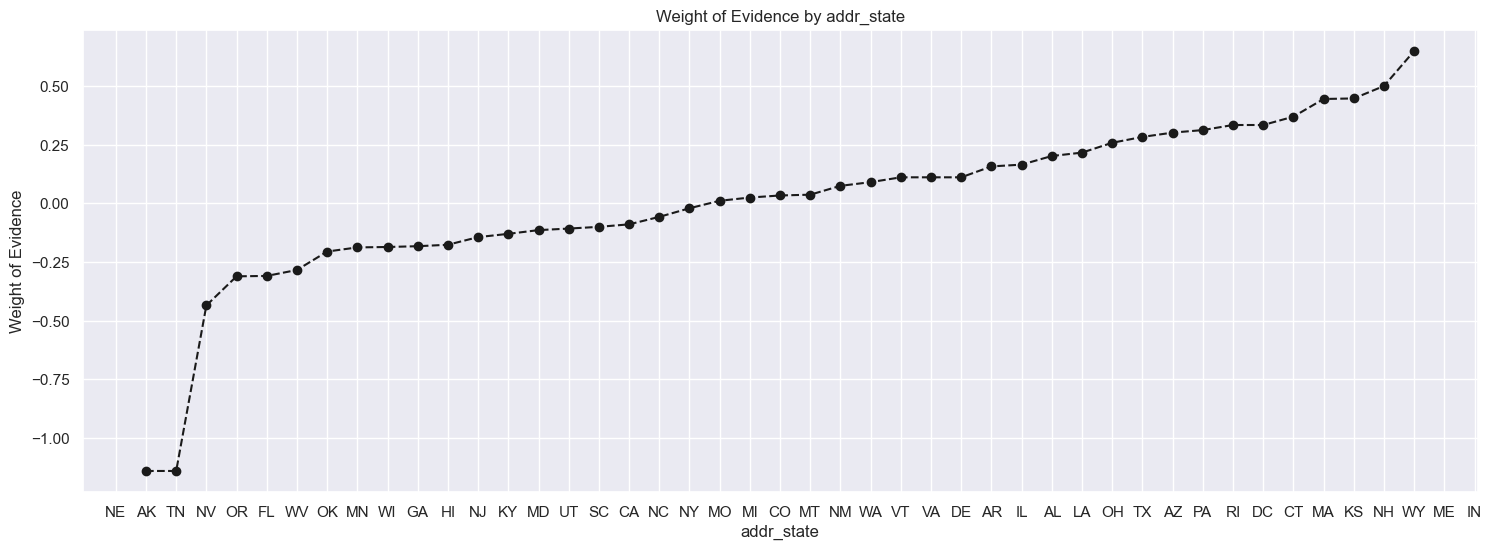

In [59]:
plot_by_woe(df_temp)

In [60]:
if 'addr_state : ND' in df_inputs_prep.columns.values:
    pass
else:
    df_inputs_prep['addr_state : ND'] = 0

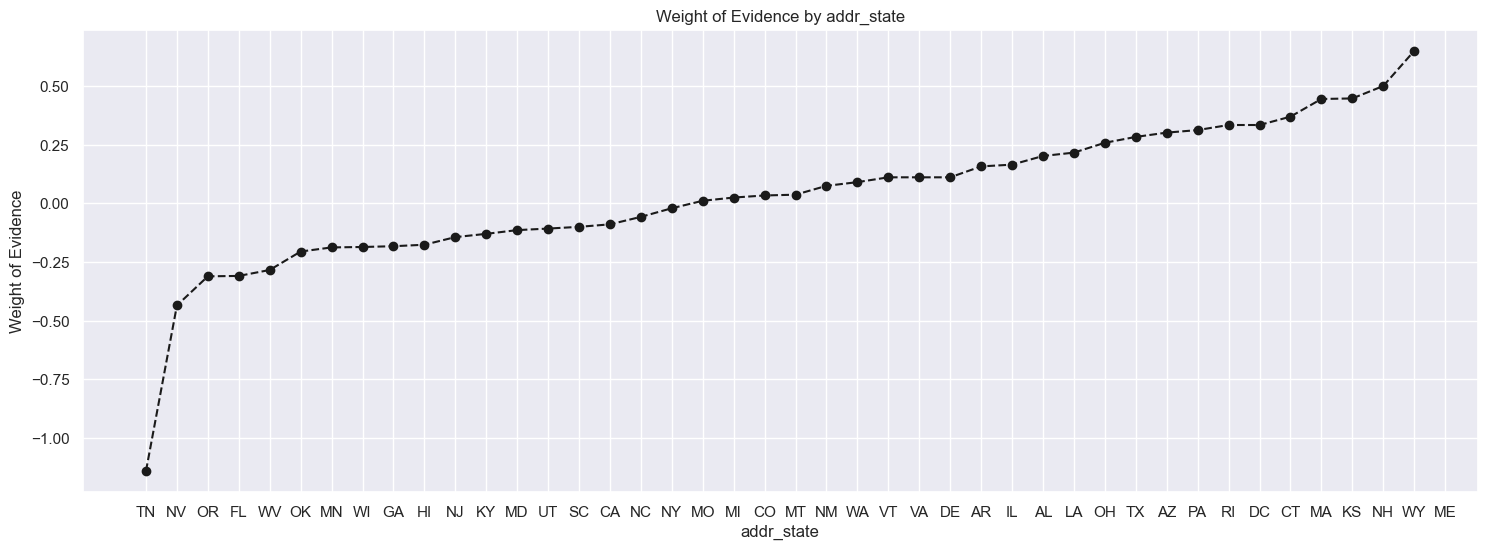

In [61]:
plot_by_woe(df_temp.iloc[2 :-3 , :])

##### Categories for addr_state
1. NE SD AK NV NM FL ND<br>
2. ID TN HI MD WA NH<br>
3. CA<br>
4. UT GA NJ<br>
5. OR KY NC SC MI<br>
6. MO OK VT MT MN<br>
7. NY<br>
8. TX AL LA KS DC DE WY IA IN ME<br>

In [62]:
df_inputs_prep['addr_state : NE_SD_AK_NV_NM_FL_ND'] = sum([df_inputs_prep['addr_state : NE'],df_inputs_prep['addr_state : SD'],df_inputs_prep['addr_state : AK'],df_inputs_prep['addr_state : NV'],df_inputs_prep['addr_state : NM'],df_inputs_prep['addr_state : FL'],df_inputs_prep['addr_state : ND']])

df_inputs_prep['addr_state : ID_TN_HI_MD_WA_NH'] = sum([df_inputs_prep['addr_state : ID'],df_inputs_prep['addr_state : TN'],df_inputs_prep['addr_state : HI'],df_inputs_prep['addr_state : MD'],df_inputs_prep['addr_state : WA'],df_inputs_prep['addr_state : NH']])

df_inputs_prep['addr_state : UT_GA_NJ'] = sum([df_inputs_prep['addr_state : UT'],df_inputs_prep['addr_state : GA'],df_inputs_prep['addr_state : NJ']])

df_inputs_prep['addr_state : OR_KY_NC_SC_MI'] = sum([df_inputs_prep['addr_state : OR'],df_inputs_prep['addr_state : KY'],df_inputs_prep['addr_state : NC'],df_inputs_prep['addr_state : SC'],df_inputs_prep['addr_state : MI']])

df_inputs_prep['addr_state : MO_OK_VT_MT_MN'] = sum([df_inputs_prep['addr_state : MO'],df_inputs_prep['addr_state : OK'],df_inputs_prep['addr_state : VT'],df_inputs_prep['addr_state : MT'],df_inputs_prep['addr_state : MN']])

df_inputs_prep['addr_state : TX_AL_LA_KS_DC_DE_WY_IA_IN_ME'] = sum([df_inputs_prep['addr_state : TX'],df_inputs_prep['addr_state : AL'],df_inputs_prep['addr_state : LA'],df_inputs_prep['addr_state : KS'],df_inputs_prep['addr_state : DC'],df_inputs_prep['addr_state : DE'],df_inputs_prep['addr_state : WY'],df_inputs_prep['addr_state : IA'],df_inputs_prep['addr_state : IN'],df_inputs_prep['addr_state : ME']])

df_inputs_prep['addr_state : CA'] = df_inputs_prep['addr_state : CA'].map({True: 1, False: 0})

df_inputs_prep['addr_state : NY'] = df_inputs_prep['addr_state : NY'].map({True: 1, False: 0})

#### 4 . Processing discrete variable : purpose

In [63]:
df_temp = woe_discrete(df_inputs_prep, 'purpose' , df_targets_prep)
df_temp

purpose  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       small_business    361   0.747922    0.045443   270.0   91.0   
1               moving    110   0.827273    0.013847    91.0   19.0   
2                other    786   0.844784    0.098943   664.0  122.0   
3   debt_consolidation   3747   0.854283    0.471677  3201.0  546.0   
4              medical    141   0.865248    0.017749   122.0   19.0   
5                  car    296   0.875000    0.037261   259.0   37.0   
6             vacation     74   0.878378    0.009315    65.0    9.0   
7              wedding    194   0.881443    0.024421   171.0   23.0   
8     home_improvement    593   0.888702    0.074648   527.0   66.0   
9          educational     65   0.892308    0.008182    58.0    7.0   
10    renewable_energy     19   0.894737    0.002392    17.0    2.0   
11      major_purchase    432   0.895833    0.054381   387.0   45.0   
12         credit_card   1050   0.903810    0.132175   949.0  101.0   
13               house     76   0.907895    0.009567    69.0    7.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.039416    0.083181 -0.746845             NaN       NaN  0.069347  
1      0.013285    0.017367 -0.267987        0.079350  0.478858  0.069347  
2      0.096934    0.111517 -0.140147        0.017511  0.127841  0.069347  
3      0.467299    0.499086 -0.065808        0.009500  0.074338  0.069347  
4      0.017810    0.017367  0.025174        0.010965  0.090983  0.069347  
5      0.037810    0.033821  0.111502        0.009752  0.086328  0.069347  
6      0.009489    0.008227  0.142755        0.003378  0.031253  0.069347  
7      0.024964    0.021024  0.171761        0.003065  0.029007  0.069347  
8      0.076934    0.060329  0.243138        0.007258  0.071376  0.069347  
9      0.008467    0.006399  0.280125        0.003606  0.036987  0.069347  
10     0.002482    0.001828  0.305658        0.002429  0.025533  0.069347  
11     0.056496    0.041133  0.317354        0.001096  0.011696  0.069347  
12     0.138540    0.092322  0.405880        0.007976  0.088526  0.069347  
13     0.010073    0.006399  0.453788        0.004085  0.047908  0.069347

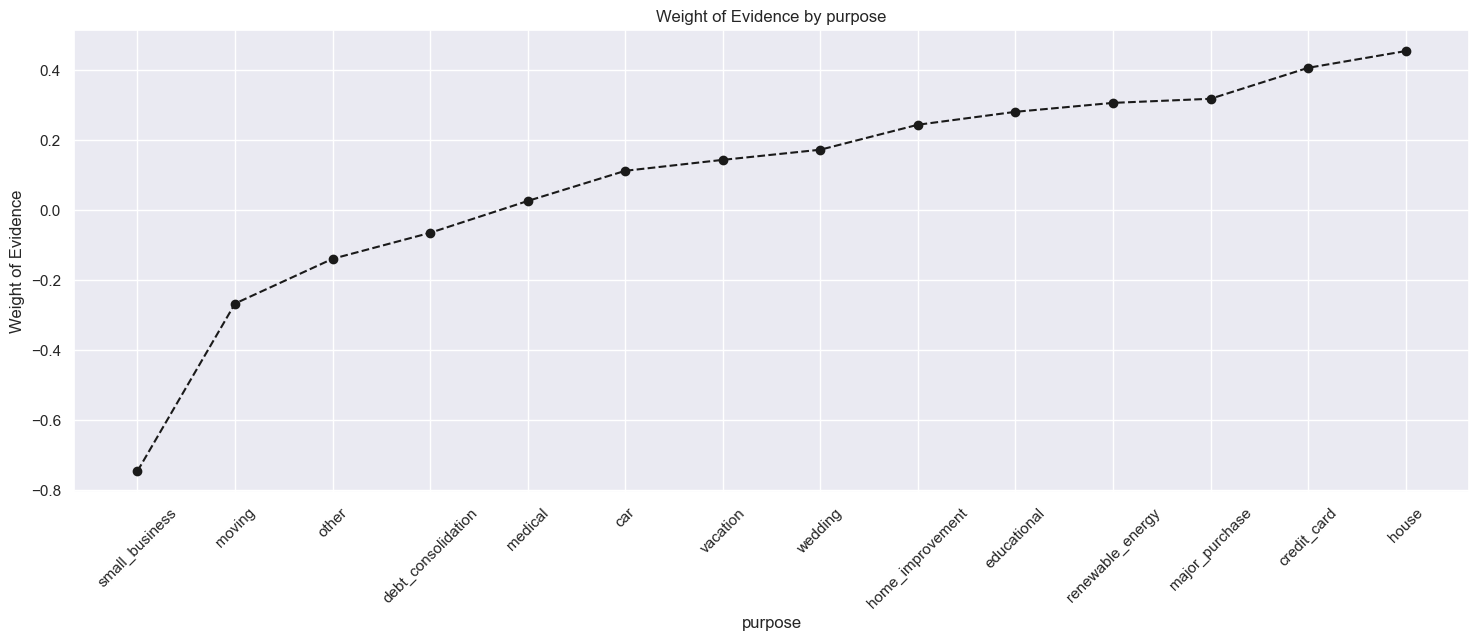

In [64]:
plot_by_woe(df_temp, 45)

In [65]:
df_inputs_prep['purpose : renewableEnergy_educational_house'] = sum([df_inputs_prep['purpose : renewable_energy'],df_inputs_prep['purpose : educational'],df_inputs_prep['purpose : house']])

df_inputs_prep['purpose : medical_moving'] = sum([df_inputs_prep['purpose : medical'],df_inputs_prep['purpose : moving']])

df_inputs_prep['purpose : homeimprovement_vacation_car'] = sum([df_inputs_prep['purpose : home_improvement'],df_inputs_prep['purpose : vacation'],df_inputs_prep['purpose : car']])

df_inputs_prep['purpose : wedding_majorpurchase'] = sum([df_inputs_prep['purpose : wedding'],df_inputs_prep['purpose : major_purchase']])


df_inputs_prep['purpose : small_business'] = df_inputs_prep['purpose : small_business'].map({True: 1, False: 0})
df_inputs_prep['purpose : other'] = df_inputs_prep['purpose : other'].map({True: 1, False: 0})
df_inputs_prep['purpose : debt_consolidation'] = df_inputs_prep['purpose : debt_consolidation'].map({True: 1, False: 0})
df_inputs_prep['purpose : credit_card'] = df_inputs_prep['purpose : credit_card'].map({True: 1, False: 0})

#### 5 . Processing discrete variable : verification_status

In [66]:
df_temp = woe_discrete(df_inputs_prep, 'verification_status' , df_targets_prep)
df_temp

verification_status  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0            Verified   2587   0.836877    0.325655  2165.0  422.0   
1     Source Verified   1992   0.868976    0.250755  1731.0  261.0   
2        Not Verified   3365   0.877860    0.423590  2954.0  411.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.316058    0.385740 -0.199238             NaN       NaN  0.022358  
1     0.252701    0.238574  0.057526        0.032099  0.256764  0.022358  
2     0.431241    0.375686  0.137914        0.008884  0.080388  0.022358

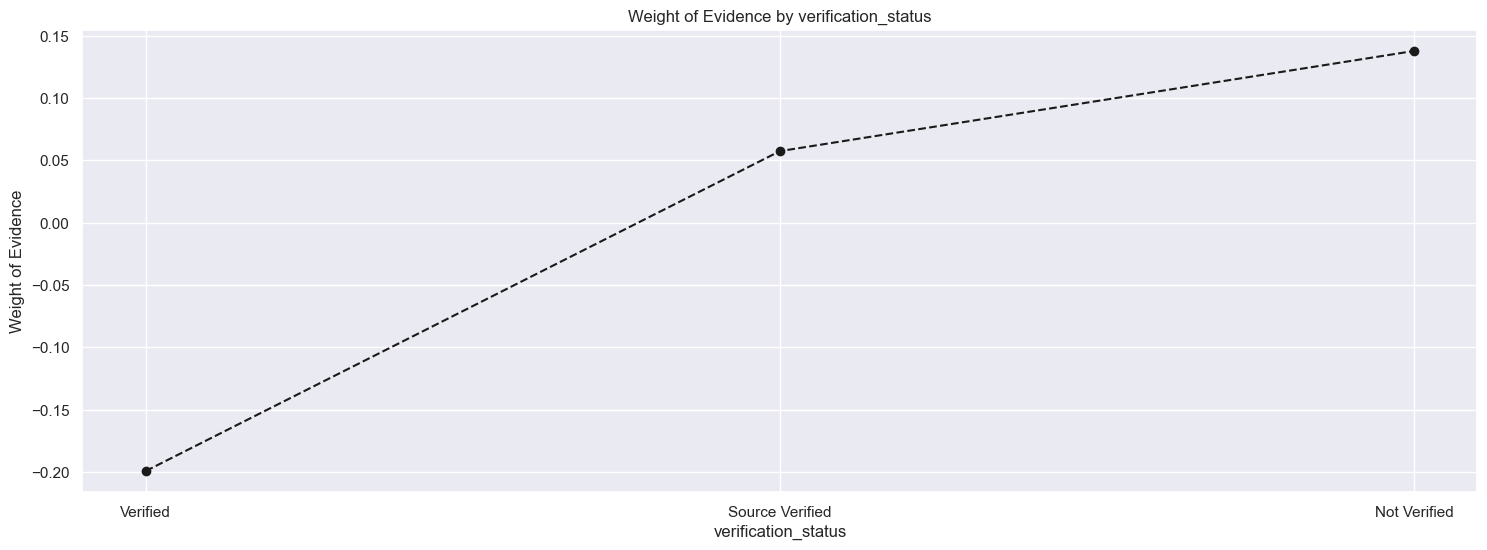

In [67]:
plot_by_woe(df_temp)

In [68]:
df_inputs_prep['verification_status : Verified_SourceVerified'] = sum([df_inputs_prep['verification_status : Verified'],df_inputs_prep['verification_status : Source Verified']])

df_inputs_prep['verification_status : Not Verified'] = df_inputs_prep['verification_status : Not Verified'].map({True: 1, False: 0})

#### 6 . Processing discrete variable : initial_list_status

In [69]:
df_temp = woe_discrete(df_inputs_prep, 'initial_list_status' , df_targets_prep)
df_temp

initial_list_status  n_obs  prop_good  prop_n_obs  n_good   n_bad  \
0                   f   7944   0.862286         1.0  6850.0  1094.0   

   prop_n_good  prop_n_bad  WoE  diff_prop_good  diff_WoE   IV  
0          1.0         1.0  0.0             NaN       NaN  0.0

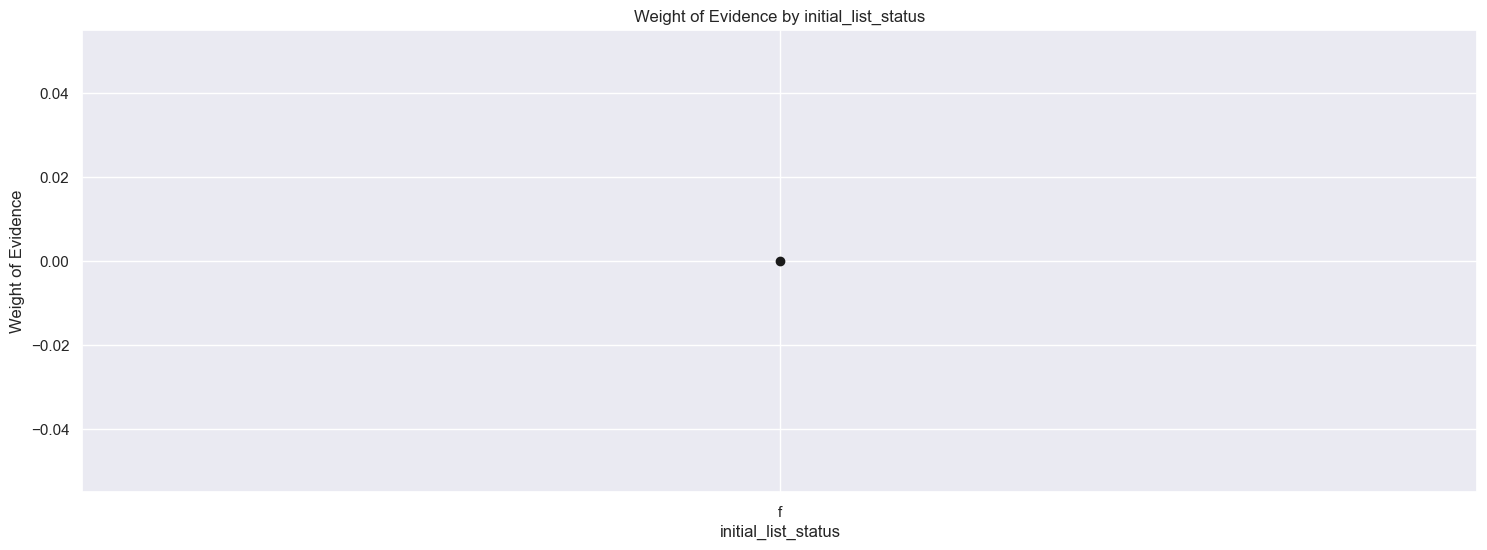

In [70]:
plot_by_woe(df_temp)

In [71]:
loan_data_clean['initial_list_status'].describe()

count     39717
unique        1
top           f
freq      39717
Name: initial_list_status, dtype: object

### Continous Variables : Automating Calculation and Visualizing results

**Handling Continuous Variables with Fine and Coarse Classing :** When dealing with continuous variables, it's often useful to convert them into categorical data by creating intervals (bins).
- **Fine Classing :** Dividing a continuous variable into intervals of equal size.
    - Implementation:
        - Decide the interval size.
        - Create bins such that each bin has the same range.
- **Coarse Classing :** Dividing a continuous variable into intervals of unequal size.
    - Implementation:
        - Decide the bin edges based on the distribution of data or business logic.
        - Create bins with varying ranges.

In [72]:
def woe_ordered_continous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()], axis =1 )
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = ( df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Preprocessing Continous Variables

#### 1 . Processing continous variable : term_int

In [73]:
df_temp = woe_ordered_continous(df_inputs_prep,'term_int',df_targets_prep)
df_temp

term_int  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0       36   5818   0.892403    0.732377  5192.0  626.0     0.757956   
1       60   2126   0.779868    0.267623  1658.0  468.0     0.242044   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.572212  0.281116             NaN       NaN  0.157999  
1    0.427788 -0.569509        0.112535  0.850625  0.157999

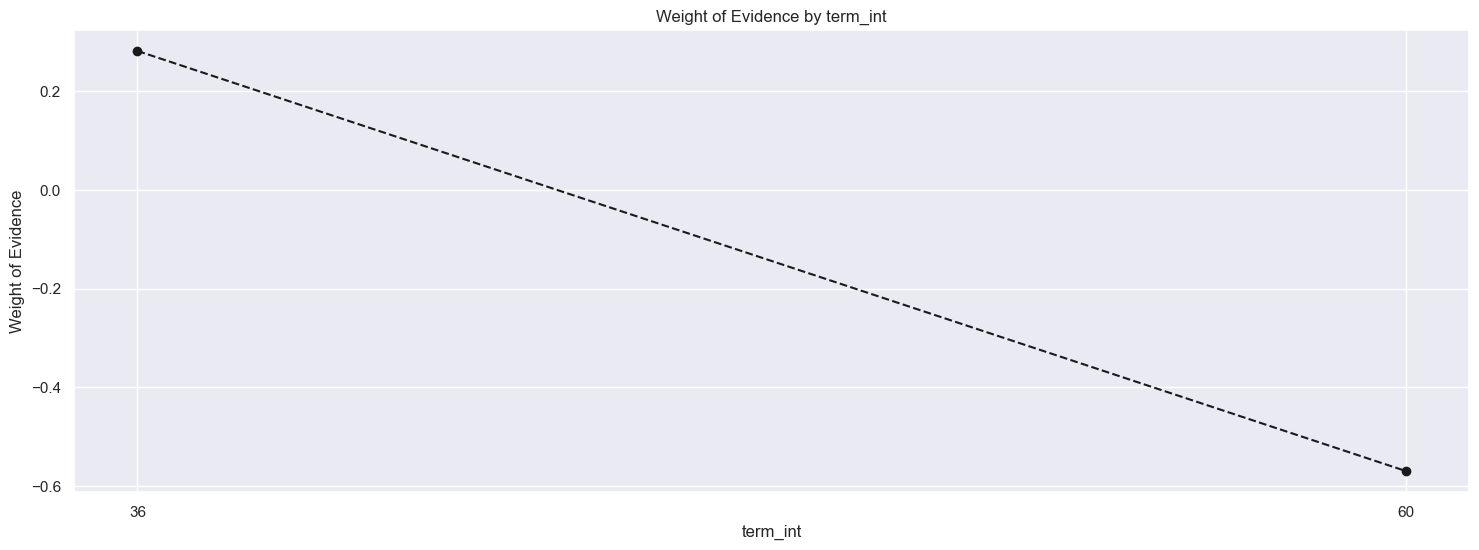

In [74]:
plot_by_woe(df_temp)

In [75]:
df_inputs_prep['term_int : 36'] = np.where((df_inputs_prep['term_int']==36),1,0)
df_inputs_prep['term_int : 60'] = np.where((df_inputs_prep['term_int']==60),1,0)

#### 2 . Processing continous variable : emp_length_int

In [76]:
df_temp = woe_ordered_continous(df_inputs_prep,'emp_length_int',df_targets_prep)
df_temp

emp_length_int  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0                0    235   0.804255    0.029582   189.0   46.0     0.027591   
1                1   1566   0.865262    0.197130  1355.0  211.0     0.197810   
2                2    856   0.875000    0.107754   749.0  107.0     0.109343   
3                3    841   0.859691    0.105866   723.0  118.0     0.105547   
4                4    664   0.879518    0.083585   584.0   80.0     0.085255   
5                5    654   0.865443    0.082326   566.0   88.0     0.082628   
6                6    457   0.864333    0.057528   395.0   62.0     0.057664   
7                7    351   0.854701    0.044184   300.0   51.0     0.043796   
8                8    321   0.862928    0.040408   277.0   44.0     0.040438   
9                9    257   0.871595    0.032351   224.0   33.0     0.032701   
10              10   1742   0.854191    0.219285  1488.0  254.0     0.217226   

    prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.042048 -0.421302             NaN       NaN  0.010866  
1     0.192870  0.025291        0.061006  0.446593  0.010866  
2     0.097806  0.111502        0.009738  0.086212  0.010866  
3     0.107861 -0.021683        0.015309  0.133186  0.010866  
4     0.073126  0.153466        0.019827  0.175150  0.010866  
5     0.080439  0.026849        0.014075  0.126617  0.010866  
6     0.056673  0.017343        0.001111  0.009506  0.010866  
7     0.046618 -0.062451        0.009632  0.079795  0.010866  
8     0.040219  0.005420        0.008227  0.067871  0.010866  
9     0.030165  0.080731        0.008667  0.075311  0.010866  
10    0.232176 -0.066554        0.017405  0.147285  0.010866

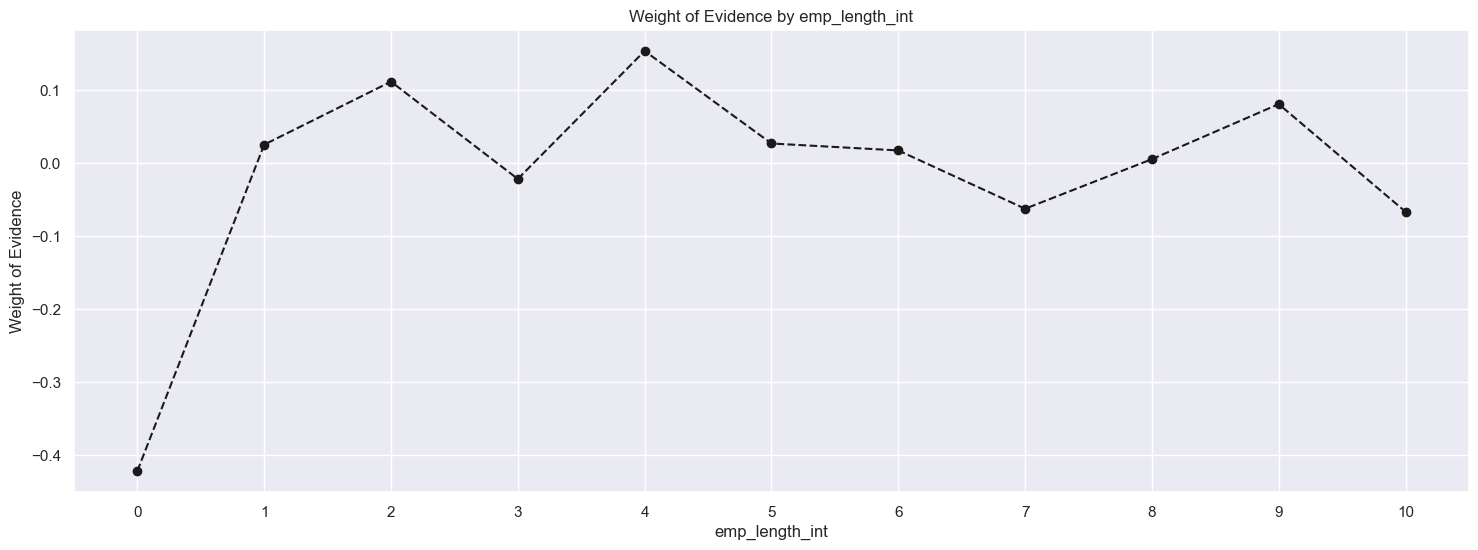

In [77]:
plot_by_woe(df_temp)

In [78]:
df_inputs_prep['emp_length_int : 0'] = np.where(df_inputs_prep['emp_length_int'].isin([0]), 1, 0)
df_inputs_prep['emp_length_int : 1'] = np.where(df_inputs_prep['emp_length_int'].isin([1]), 1, 0)
df_inputs_prep['emp_length_int : 2-4'] = np.where(df_inputs_prep['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prep['emp_length_int : 5-7'] = np.where(df_inputs_prep['emp_length_int'].isin(range(5, 8)), 1, 0)
df_inputs_prep['emp_length_int : 8-9'] = np.where(df_inputs_prep['emp_length_int'].isin(range(8, 10)), 1, 0)
df_inputs_prep['emp_length_int : >10'] = np.where(df_inputs_prep['emp_length_int'].isin(range(10,)), 1, 0)

#### 3 . Processing continous variable : mnths_since_issue_d

In [79]:
df_inputs_prep['mnths_since_issue_d_factor'] = pd.cut(df_inputs_prep['mnths_since_issue_d'],50)

In [80]:
df_temp = woe_ordered_continous(df_inputs_prep,'mnths_since_issue_d_factor',df_targets_prep)
df_temp

mnths_since_issue_d_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0           (147.947, 149.06]    936   0.835470    0.117825   782.0  154.0   
1            (149.06, 150.12]    427   0.889930    0.053751   380.0   47.0   
2            (150.12, 151.18]    436   0.853211    0.054884   372.0   64.0   
3            (151.18, 152.24]    363   0.865014    0.045695   314.0   49.0   
4             (152.24, 153.3]    353   0.832861    0.044436   294.0   59.0   
5             (153.3, 154.36]    386   0.841969    0.048590   325.0   61.0   
6            (154.36, 155.42]    322   0.860248    0.040534   277.0   45.0   
7            (155.42, 156.48]    272   0.849265    0.034240   231.0   41.0   
8            (156.48, 157.54]    291   0.845361    0.036631   246.0   45.0   
9             (157.54, 158.6]    262   0.893130    0.032981   234.0   28.0   
10            (158.6, 159.66]    266   0.864662    0.033484   230.0   36.0   
11           (159.66, 160.72]    255   0.890196    0.032100   227.0   28.0   
12           (160.72, 161.78]    198   0.914141    0.024924   181.0   17.0   
13           (161.78, 162.84]    237   0.864979    0.029834   205.0   32.0   
14            (162.84, 163.9]    226   0.867257    0.028449   196.0   30.0   
15            (163.9, 164.96]    213   0.868545    0.026813   185.0   28.0   
16           (164.96, 166.02]    438   0.844749    0.055136   370.0   68.0   
17           (166.02, 167.08]    201   0.890547    0.025302   179.0   22.0   
18           (167.08, 168.14]    162   0.882716    0.020393   143.0   19.0   
19            (168.14, 169.2]    143   0.923077    0.018001   132.0   11.0   
20            (169.2, 170.26]    118   0.906780    0.014854   107.0   11.0   
21           (170.26, 171.32]    121   0.892562    0.015232   108.0   13.0   
22           (171.32, 172.38]    113   0.893805    0.014225   101.0   12.0   
23           (172.38, 173.44]    124   0.854839    0.015609   106.0   18.0   
24            (173.44, 174.5]     96   0.843750    0.012085    81.0   15.0   
25            (174.5, 175.56]     94   0.797872    0.011833    75.0   19.0   
26           (175.56, 176.62]     87   0.873563    0.010952    76.0   11.0   
27           (176.62, 177.68]     73   0.904110    0.009189    66.0    7.0   
28           (177.68, 178.74]     81   0.827160    0.010196    67.0   14.0   
29            (178.74, 179.8]     67   0.895522    0.008434    60.0    7.0   
30            (179.8, 180.86]     54   0.888889    0.006798    48.0    6.0   
31           (180.86, 181.92]     62   0.903226    0.007805    56.0    6.0   
32           (181.92, 182.98]     55   0.927273    0.006923    51.0    4.0   
33           (182.98, 184.04]     90   0.844444    0.011329    76.0   14.0   
34            (184.04, 185.1]     38   0.868421    0.004783    33.0    5.0   
35            (185.1, 186.16]     23   0.826087    0.002895    19.0    4.0   
36           (186.16, 187.22]      9   0.888889    0.001133     8.0    1.0   
37           (187.22, 188.28]     13   0.692308    0.001636     9.0    4.0   
38           (188.28, 189.34]     12   0.833333    0.001511    10.0    2.0   
39            (189.34, 190.4]     13   0.923077    0.001636    12.0    1.0   
40            (190.4, 191.46]     12   1.000000    0.001511    12.0    0.0   
41           (191.46, 192.52]     32   0.843750    0.004028    27.0    5.0   
42           (192.52, 193.58]     54   0.833333    0.006798    45.0    9.0   
43           (193.58, 194.64]     36   0.861111    0.004532    31.0    5.0   
44            (194.64, 195.7]     34   0.823529    0.004280    28.0    6.0   
45            (195.7, 196.76]     14   0.714286    0.001762    10.0    4.0   
46           (196.76, 197.82]      6   0.833333    0.000755     5.0    1.0   
47           (197.82, 198.88]     10   0.600000    0.001259     6.0    4.0   
48           (198.88, 199.94]      5   1.000000    0.000629     5.0    0.0   
49            (199.94, 201.0]     11   0.818182    0.001385     9.0    2.0   

    prop_n_good  prop_n_

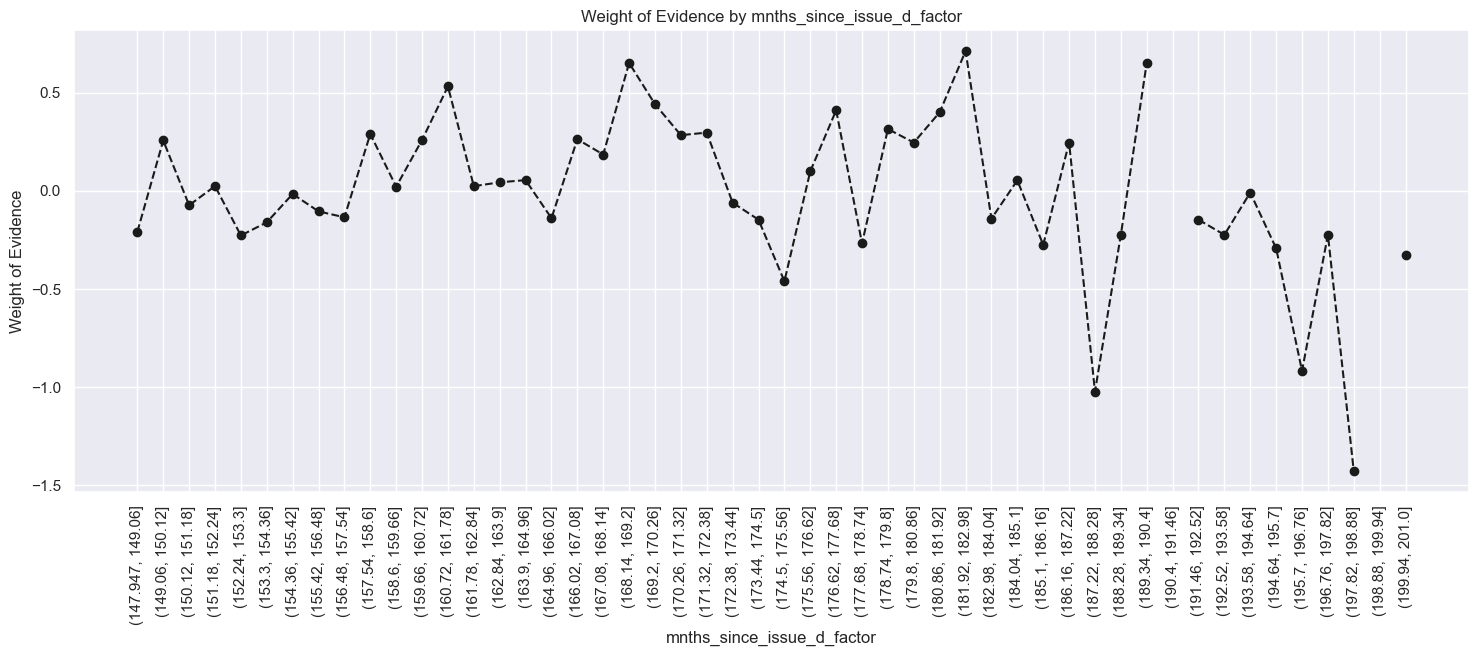

In [81]:
plot_by_woe(df_temp,90)

In [82]:
df_inputs_prep['mnths_since_issue_d : <149'] = np.where(df_inputs_prep['mnths_since_issue_d'] < 149, 1, 0)
df_inputs_prep['mnths_since_issue_d : 149-154'] = np.where((df_inputs_prep['mnths_since_issue_d'] >= 149) & (df_inputs_prep['mnths_since_issue_d'] <= 154), 1, 0)
df_inputs_prep['mnths_since_issue_d : 154-160'] = np.where((df_inputs_prep['mnths_since_issue_d'] >= 154) & (df_inputs_prep['mnths_since_issue_d'] <= 160), 1, 0)
df_inputs_prep['mnths_since_issue_d : 160-167'] = np.where((df_inputs_prep['mnths_since_issue_d'] >= 160) & (df_inputs_prep['mnths_since_issue_d'] <= 167), 1, 0)
df_inputs_prep['mnths_since_issue_d : 167-175'] = np.where((df_inputs_prep['mnths_since_issue_d'] >= 167) & (df_inputs_prep['mnths_since_issue_d'] <= 175), 1, 0)
df_inputs_prep['mnths_since_issue_d : 175-183'] = np.where((df_inputs_prep['mnths_since_issue_d'] >= 175) & (df_inputs_prep['mnths_since_issue_d'] <= 183), 1, 0)
df_inputs_prep['mnths_since_issue_d : >183'] = np.where(df_inputs_prep['mnths_since_issue_d'] > 183, 1, 0)

#### 4 . Processing continous variable : mnths_since_earliest_cr_line

In [83]:
df_temp = woe_ordered_continous(df_inputs_prep,'mnths_since_earliest_cr_line',df_targets_prep)
df_temp

mnths_since_earliest_cr_line  n_obs  prop_good  prop_n_obs  n_good  \
0                           186.0      1       1.00    0.000126     1.0   
1                           187.0      4       0.75    0.000504     3.0   
2                           188.0      1       1.00    0.000126     1.0   
3                           190.0      1       1.00    0.000126     1.0   
4                           191.0      1       1.00    0.000126     1.0   
..                            ...    ...        ...         ...     ...   
440                         654.0      1       1.00    0.000126     1.0   
441                         656.0      1       1.00    0.000126     1.0   
442                         657.0      1       1.00    0.000126     1.0   
443                         661.0      1       1.00    0.000126     1.0   
444                         662.0     12       0.75    0.001511     9.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.0     0.000146    0.000000       inf             NaN       NaN  inf  
1      1.0     0.000438    0.000914 -0.735796            0.25       inf  inf  
2      0.0     0.000146    0.000000       inf            0.25       inf  inf  
3      0.0     0.000146    0.000000       inf            0.00       NaN  inf  
4      0.0     0.000146    0.000000       inf            0.00       NaN  inf  
..     ...          ...         ...       ...             ...       ...  ...  
440    0.0     0.000146    0.000000       inf            0.00       NaN  inf  
441    0.0     0.000146    0.000000       inf            0.00       NaN  inf  
442    0.0     0.000146    0.000000       inf            0.00       NaN  inf  
443    0.0     0.000146    0.000000       inf            0.00       NaN  inf  
444    3.0     0.001314    0.002742 -0.735796            0.25       inf  inf  

[445 rows x 12 columns]

In [84]:
df_inputs_prep['mnths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prep['mnths_since_earliest_cr_line'],50)

In [85]:
df_temp = woe_ordered_continous(df_inputs_prep,'mnths_since_earliest_cr_line_factor',df_targets_prep)
df_temp

mnths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                    (185.524, 195.52]     31   0.806452    0.003902    25.0   
1                     (195.52, 205.04]    108   0.814815    0.013595    88.0   
2                     (205.04, 214.56]    181   0.784530    0.022784   142.0   
3                     (214.56, 224.08]    227   0.859031    0.028575   195.0   
4                      (224.08, 233.6]    227   0.814978    0.028575   185.0   
5                      (233.6, 243.12]    323   0.900929    0.040660   291.0   
6                     (243.12, 252.64]    312   0.842949    0.039275   263.0   
7                     (252.64, 262.16]    341   0.868035    0.042925   296.0   
8                     (262.16, 271.68]    298   0.855705    0.037513   255.0   
9                      (271.68, 281.2]    444   0.858108    0.055891   381.0   
10                     (281.2, 290.72]    469   0.874200    0.059038   410.0   
11                    (290.72, 300.24]    507   0.844181    0.063822   428.0   
12                    (300.24, 309.76]    448   0.848214    0.056395   380.0   
13                    (309.76, 319.28]    408   0.857843    0.051360   350.0   
14                     (319.28, 328.8]    344   0.866279    0.043303   298.0   
15                     (328.8, 338.32]    357   0.890756    0.044940   318.0   
16                    (338.32, 347.84]    342   0.874269    0.043051   299.0   
17                    (347.84, 357.36]    347   0.893372    0.043681   310.0   
18                    (357.36, 366.88]    280   0.850000    0.035247   238.0   
19                     (366.88, 376.4]    235   0.897872    0.029582   211.0   
20                     (376.4, 385.92]    141   0.843972    0.017749   119.0   
21                    (385.92, 395.44]    178   0.842697    0.022407   150.0   
22                    (395.44, 404.96]    150   0.846667    0.018882   127.0   
23                    (404.96, 414.48]    165   0.890909    0.020770   147.0   
24                     (414.48, 424.0]    154   0.863636    0.019386   133.0   
25                     (424.0, 433.52]     99   0.858586    0.012462    85.0   
26                    (433.52, 443.04]    115   0.895652    0.014476   103.0   
27                    (443.04, 452.56]     91   0.901099    0.011455    82.0   
28                    (452.56, 462.08]     75   0.880000    0.009441    66.0   
29                     (462.08, 471.6]     68   0.838235    0.008560    57.0   
30                     (471.6, 481.12]     62   0.887097    0.007805    55.0   
31                    (481.12, 490.64]     49   0.816327    0.006168    40.0   
32                    (490.64, 500.16]     57   0.789474    0.007175    45.0   
33                    (500.16, 509.68]     32   0.781250    0.004028    25.0   
34                     (509.68, 519.2]     24   0.958333    0.003021    23.0   
35                     (519.2, 528.72]     35   1.000000    0.004406    35.0   
36                    (528.72, 538.24]     34   0.823529    0.004280    28.0   
37                    (538.24, 547.76]     27   0.814815    0.003399    22.0   
38                    (547.76, 557.28]     21   0.857143    0.002644    18.0   
39                     (557.28, 566.8]     12   1.000000    0.001511    12.0   
40                     (566.8, 576.32]     23   0.956522    0.002895    22.0   
41                    (576.32, 585.84]      5   1.000000    0.000629     5.0   
42                    (585.84, 595.36]     14   0.928571    0.001762    13.0   
43                    (595.36, 604.88]     17   0.823529    0.002140    14.0   
44                     (604.88, 614.4]      9   1.000000    0.001133     9.0   
45                     (614.4, 623.92]     12   0.833333    0.001511    10.0   
46                    (623.92, 633.44]     10   0.900000    0.001259     9.0   
47                    (633.44, 642.96]      8   1.000000    0.001007     8.0   
48                    (642.96, 652.48]      9   1.000000    0.001133     9.0   
49 

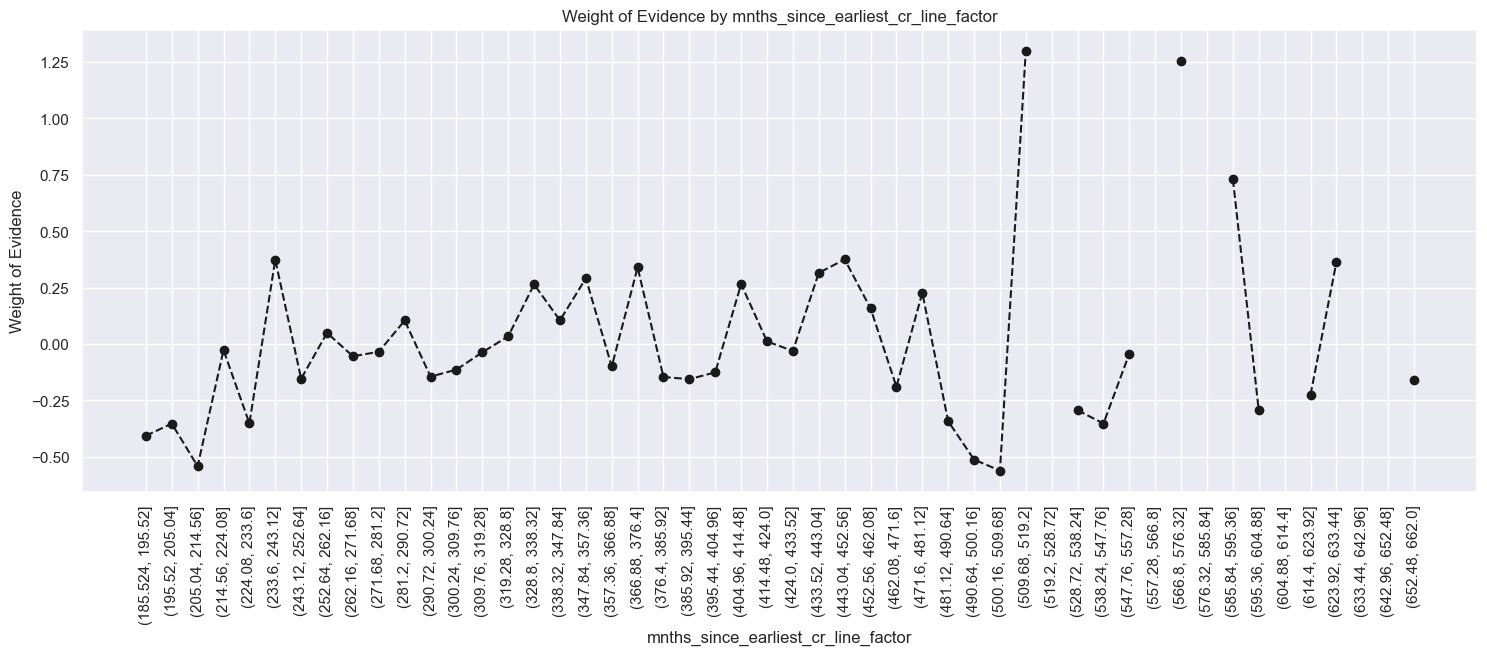

In [86]:
plot_by_woe(df_temp,90)

In [87]:
df_inputs_prep['mnths_since_earliest_cr_line_factor : < 194'] = np.where((df_inputs_prep['mnths_since_earliest_cr_line'] <= 194), 1, 0)
df_inputs_prep['mnths_since_earliest_cr_line_factor : 194-213'] = np.where((df_inputs_prep['mnths_since_earliest_cr_line'] > 194) & (df_inputs_prep['mnths_since_earliest_cr_line'] <= 213), 1, 0)
df_inputs_prep['mnths_since_earliest_cr_line_factor : 213-270'] = np.where((df_inputs_prep['mnths_since_earliest_cr_line'] > 213) & (df_inputs_prep['mnths_since_earliest_cr_line'] <= 270), 1, 0)
df_inputs_prep['mnths_since_earliest_cr_line_factor : 270-366'] = np.where((df_inputs_prep['mnths_since_earliest_cr_line'] > 270) & (df_inputs_prep['mnths_since_earliest_cr_line'] <= 366), 1, 0)
df_inputs_prep['mnths_since_earliest_cr_line_factor : 366-433'] = np.where((df_inputs_prep['mnths_since_earliest_cr_line'] > 366) & (df_inputs_prep['mnths_since_earliest_cr_line'] <= 433), 1, 0)
df_inputs_prep['mnths_since_earliest_cr_line_factor : 433-490'] = np.where((df_inputs_prep['mnths_since_earliest_cr_line'] > 433) & (df_inputs_prep['mnths_since_earliest_cr_line'] <= 490), 1, 0)
df_inputs_prep['mnths_since_earliest_cr_line_factor : > 490'] = np.where((df_inputs_prep['mnths_since_earliest_cr_line'] > 490), 1, 0)

#### 5 . Processing continous variable : delinq_2yrs

In [88]:
df_temp = woe_ordered_continous(df_inputs_prep,'delinq_2yrs',df_targets_prep)
df_temp

delinq_2yrs  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0            0   7109   0.864116    0.894889  6143.0  966.0     0.896788   
1            1    644   0.846273    0.081067   545.0   99.0     0.079562   
2            2    123   0.845528    0.015483   104.0   19.0     0.015182   
3            3     49   0.836735    0.006168    41.0    8.0     0.005985   
4            4     12   0.833333    0.001511    10.0    2.0     0.001460   
5            5      4   1.000000    0.000504     4.0    0.0     0.000584   
6            6      2   1.000000    0.000252     2.0    0.0     0.000292   
7            7      1   1.000000    0.000126     1.0    0.0     0.000146   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.882998  0.015497             NaN       NaN  inf  
1    0.090494 -0.128742        0.017843  0.144239  inf  
2    0.017367 -0.134456        0.000745  0.005714  inf  
3    0.007313 -0.200277        0.008794  0.065821  inf  
4    0.001828 -0.224970        0.003401  0.024693  inf  
5    0.000000       inf        0.166667       inf  inf  
6    0.000000       inf        0.000000       NaN  inf  
7    0.000000       inf        0.000000       NaN  inf

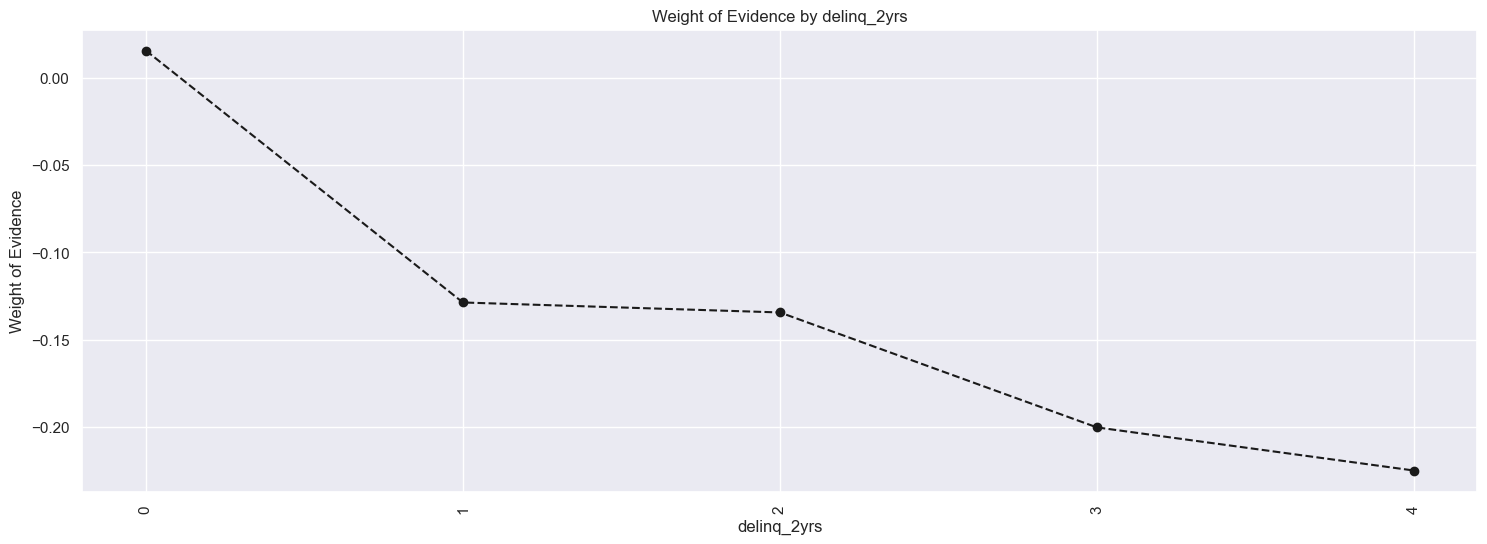

In [89]:
plot_by_woe(df_temp,90)

In [90]:
df_inputs_prep['delinq_2yrs_factor : 0'] = np.where(df_inputs_prep['delinq_2yrs'].isin([0]), 1, 0)
df_inputs_prep['delinq_2yrs_factor : 1'] = np.where(df_inputs_prep['delinq_2yrs'].isin([1]), 1, 0)
df_inputs_prep['delinq_2yrs_factor : 2-4'] = np.where(df_inputs_prep['delinq_2yrs'].isin(range(2, 5)), 1, 0)
df_inputs_prep['delinq_2yrs_factor : >=5'] = np.where(df_inputs_prep['delinq_2yrs'].isin(range(5,)), 1, 0)

#### 6 . Processing continous variable : inq_last_6mths

In [91]:
df_temp = woe_ordered_continous(df_inputs_prep,'inq_last_6mths',df_targets_prep)
df_temp

inq_last_6mths  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0               0   3867   0.882079    0.486782  3411.0  456.0     0.497956   
1               1   2191   0.852122    0.275806  1867.0  324.0     0.272555   
2               2   1169   0.854577    0.147155   999.0  170.0     0.145839   
3               3    593   0.794266    0.074648   471.0  122.0     0.068759   
4               4     71   0.830986    0.008938    59.0   12.0     0.008613   
5               5     35   0.828571    0.004406    29.0    6.0     0.004234   
6               6      9   0.777778    0.001133     7.0    2.0     0.001022   
7               7      5   0.600000    0.000629     3.0    2.0     0.000438   
8               8      4   1.000000    0.000504     4.0    0.0     0.000584   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.416819  0.177860             NaN       NaN  inf  
1    0.296161 -0.083063        0.029957  0.260923  inf  
2    0.155393 -0.063452        0.002454  0.019612  inf  
3    0.111517 -0.483571        0.060310  0.420119  inf  
4    0.010969 -0.241777        0.036719  0.241794  inf  
5    0.005484 -0.258872        0.002414  0.017094  inf  
6    0.001828 -0.581645        0.050794  0.322773  inf  
7    0.001828 -1.428943        0.177778  0.847298  inf  
8    0.000000       inf        0.400000       inf  inf

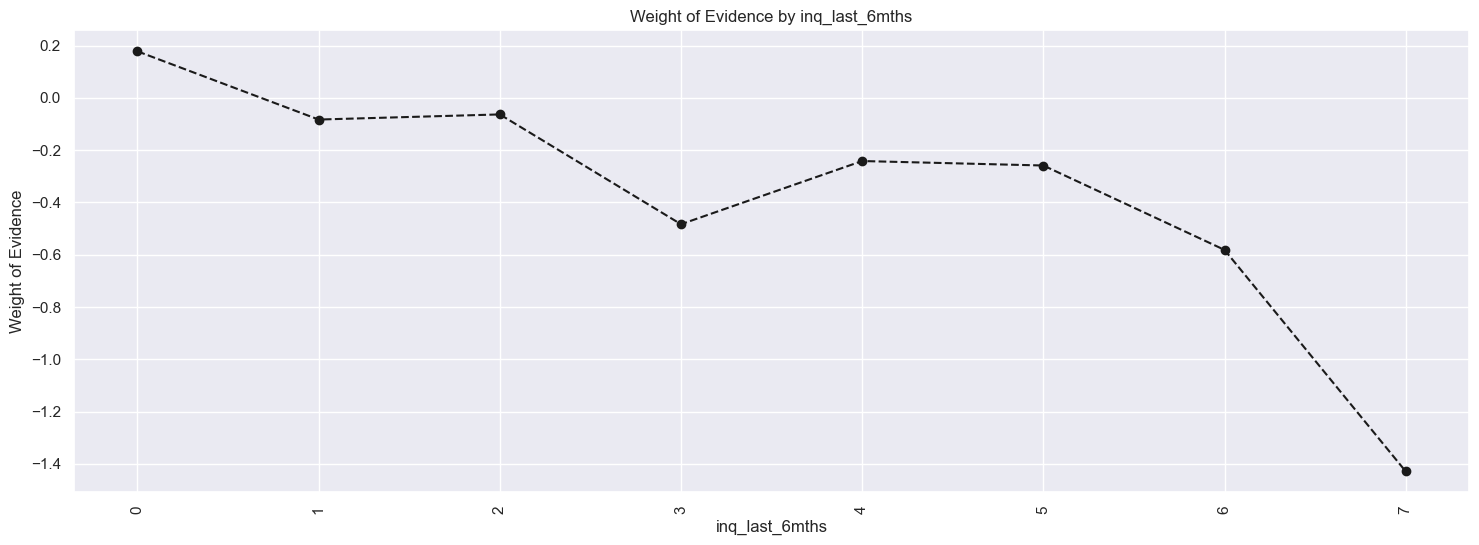

In [92]:
plot_by_woe(df_temp,90)

In [93]:
df_inputs_prep['inq_last_6mths_factor : 0'] = np.where(df_inputs_prep['inq_last_6mths'].isin([0]), 1, 0)
df_inputs_prep['inq_last_6mths_factor : 1-2'] = np.where(df_inputs_prep['inq_last_6mths'].isin(range(1, 3)), 1, 0)
df_inputs_prep['inq_last_6mths_factor : 3'] = np.where(df_inputs_prep['inq_last_6mths'].isin([3]), 1, 0)
df_inputs_prep['inq_last_6mths_factor : >4'] = np.where(df_inputs_prep['inq_last_6mths'].isin(range(4,)), 1, 0)

#### 7 . Processing continous variable : open_acc

In [94]:
df_temp = woe_ordered_continous(df_inputs_prep,'open_acc',df_targets_prep)
df_temp

open_acc  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0          2    124   0.838710    0.015609   104.0   20.0     0.015182   
1          3    302   0.791391    0.038016   239.0   63.0     0.034891   
2          4    463   0.848812    0.058283   393.0   70.0     0.057372   
3          5    676   0.862426    0.085096   583.0   93.0     0.085109   
4          6    791   0.852086    0.099572   674.0  117.0     0.098394   
5          7    799   0.854819    0.100579   683.0  116.0     0.099708   
6          8    789   0.863118    0.099320   681.0  108.0     0.099416   
7          9    717   0.863319    0.090257   619.0   98.0     0.090365   
8         10    658   0.872340    0.082830   574.0   84.0     0.083796   
9         11    531   0.873823    0.066843   464.0   67.0     0.067737   
10        12    465   0.868817    0.058535   404.0   61.0     0.058978   
11        13    361   0.880886    0.045443   318.0   43.0     0.046423   
12        14    288   0.854167    0.036254   246.0   42.0     0.035912   
13        15    237   0.877637    0.029834   208.0   29.0     0.030365   
14        16    199   0.914573    0.025050   182.0   17.0     0.026569   
15        17    168   0.880952    0.021148   148.0   20.0     0.021606   
16        18    110   0.863636    0.013847    95.0   15.0     0.013869   
17        19     75   0.893333    0.009441    67.0    8.0     0.009781   
18        20     53   0.867925    0.006672    46.0    7.0     0.006715   
19        21     42   0.880952    0.005287    37.0    5.0     0.005401   
20        22     26   0.884615    0.003273    23.0    3.0     0.003358   
21        23     24   0.916667    0.003021    22.0    2.0     0.003212   
22        24     15   0.866667    0.001888    13.0    2.0     0.001898   
23        25      5   1.000000    0.000629     5.0    0.0     0.000730   
24        26      7   0.714286    0.000881     5.0    2.0     0.000730   
25        27      5   1.000000    0.000629     5.0    0.0     0.000730   
26        28      4   0.750000    0.000504     3.0    1.0     0.000438   
27        29      4   1.000000    0.000504     4.0    0.0     0.000584   
28        30      5   1.000000    0.000629     5.0    0.0     0.000730   
29        31      1   0.000000    0.000126     0.0    1.0     0.000000   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.018282 -0.185749             NaN       NaN  inf  
1     0.057587 -0.501079        0.047319  0.315330  inf  
2     0.063985 -0.109094        0.057421  0.391986  inf  
3     0.085009  0.001180        0.013614  0.110273  inf  
4     0.106947 -0.083352        0.010340  0.084532  inf  
5     0.106033 -0.061503        0.002733  0.021848  inf  
6     0.098720  0.007023        0.008299  0.068526  inf  
7     0.089580  0.008730        0.000202  0.001707  inf  
8     0.076782  0.087405        0.009021  0.078675  inf  
9     0.061243  0.100784        0.001483  0.013379  inf  
10    0.055759  0.056133        0.005006  0.044651  inf  
11    0.039305  0.166443        0.012069  0.110310  inf  
12    0.038391 -0.066746        0.026720  0.233189  inf  
13    0.026508  0.135834        0.023470  0.202580  inf  
14    0.015539  0.536385        0.036936  0.400551  inf  
15    0.018282  0.167072        0.033620  0.369313  inf  
16    0.013711  0.011419        0.017316  0.155653  inf  
17    0.007313  0.290843        0.029697  0.279424  inf  
18    0.006399  0.048323        0.025409  0.242520  inf  
19    0.004570  0.167072        0.013028  0.118749  inf  
20    0.002742  0.202474        0.003663  0.035402  inf  
21    0.001828  0.563487        0.032051  0.361013  inf  
22    0.001828  0.037394        0.050000  0.526093  inf  
23    0.000000       inf        0.133333       inf  inf  
24    0.001828 -0.918117        0.285714       inf  inf  
25    0.000000       inf        0.285714       inf  inf  
26    0.000914 -0.735796        0.250000       inf  inf  
27    0.000000       inf        0.250000       inf  inf  
28    0.000000       inf   

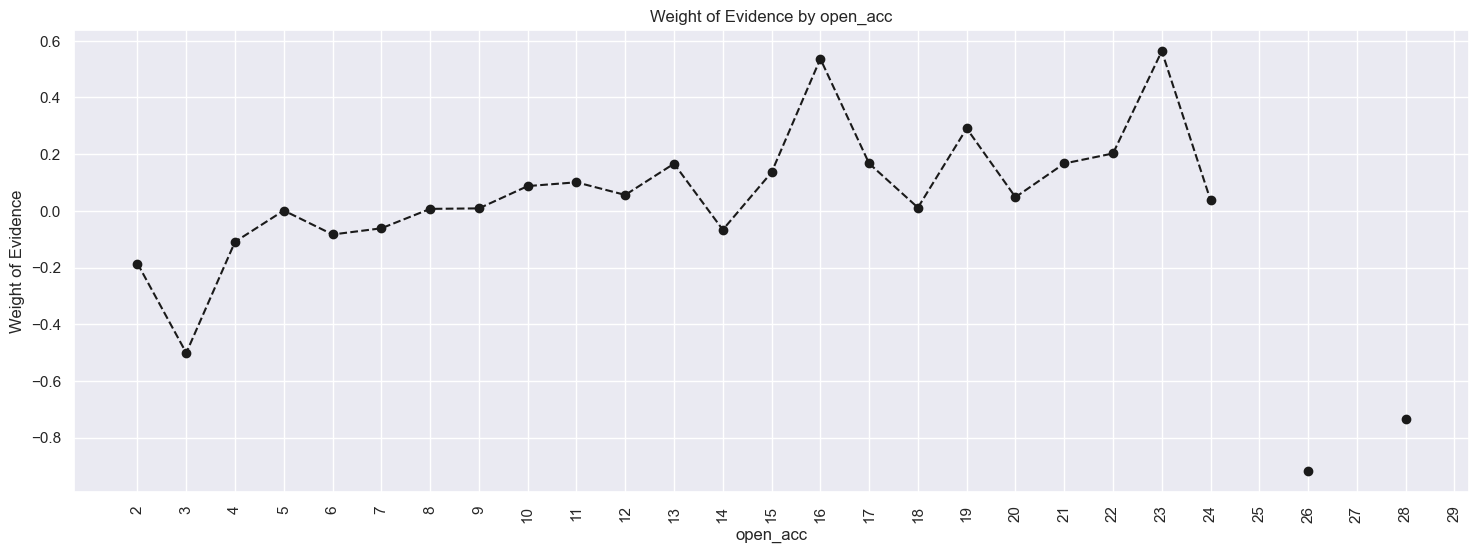

In [95]:
plot_by_woe(df_temp,90)

In [96]:
df_inputs_prep['open_acc_factor : 0-4'] = np.where(df_inputs_prep['open_acc'].isin(range(0,5)), 1, 0)
df_inputs_prep['open_acc_factor : 5-11'] = np.where(df_inputs_prep['open_acc'].isin(range(5,12)), 1, 0)
df_inputs_prep['open_acc_factor : 12-15'] = np.where(df_inputs_prep['open_acc'].isin(range(12,16)), 1, 0)
df_inputs_prep['open_acc_factor : 16-18'] = np.where(df_inputs_prep['open_acc'].isin(range(16,19)), 1, 0)
df_inputs_prep['open_acc_factor : 16-20'] = np.where(df_inputs_prep['open_acc'].isin(range(16,21)), 1, 0)
df_inputs_prep['open_acc_factor : >20'] = np.where(df_inputs_prep['open_acc'].isin(range(20,)), 1, 0)

#### 8 . Processing continous variable : pub_rec

In [97]:
df_temp = woe_ordered_continous(df_inputs_prep,'pub_rec',df_targets_prep)
df_temp

pub_rec  n_obs  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  \
0        0   7529   0.866649    0.947759  6525.0  1004.0     0.952555   
1        1    402   0.781095    0.050604   314.0    88.0     0.045839   
2        2     12   0.833333    0.001511    10.0     2.0     0.001460   
3        4      1   1.000000    0.000126     1.0     0.0     0.000146   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.917733  0.037241             NaN       NaN  inf  
1    0.080439 -0.562352        0.085554  0.599593  inf  
2    0.001828 -0.224970        0.052239  0.337382  inf  
3    0.000000       inf        0.166667       inf  inf

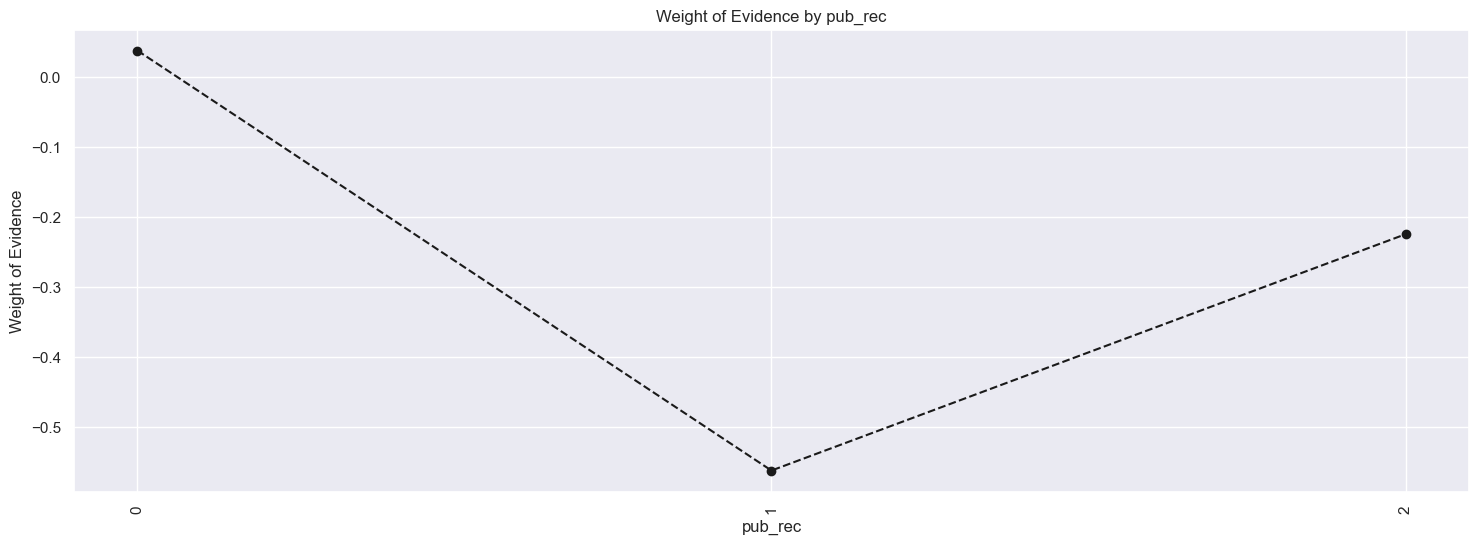

In [98]:
plot_by_woe(df_temp,90)

In [99]:
df_inputs_prep['pub_rec_factor : 0'] = np.where(df_inputs_prep['open_acc'].isin([0]), 1, 0)
df_inputs_prep['pub_rec_factor : 1'] = np.where(df_inputs_prep['open_acc'].isin([1]), 1, 0)
df_inputs_prep['pub_rec_factor : >=2'] = np.where(df_inputs_prep['open_acc'].isin(range(2,)), 1, 0)

#### 9 . Processing continous variable : total_acc

In [100]:
df_temp = woe_ordered_continous(df_inputs_prep,'total_acc',df_targets_prep)
pd.set_option('display.max_rows', None)
df_temp

total_acc  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0           2      1   0.000000    0.000126     0.0    1.0     0.000000   
1           3     40   0.675000    0.005035    27.0   13.0     0.003942   
2           4     89   0.752809    0.011203    67.0   22.0     0.009781   
3           5    117   0.854701    0.014728   100.0   17.0     0.014599   
4           6    148   0.891892    0.018630   132.0   16.0     0.019270   
5           7    142   0.788732    0.017875   112.0   30.0     0.016350   
6           8    195   0.846154    0.024547   165.0   30.0     0.024088   
7           9    241   0.817427    0.030337   197.0   44.0     0.028759   
8          10    251   0.840637    0.031596   211.0   40.0     0.030803   
9          11    263   0.851711    0.033107   224.0   39.0     0.032701   
10         12    267   0.846442    0.033610   226.0   41.0     0.032993   
11         13    286   0.853147    0.036002   244.0   42.0     0.035620   
12         14    282   0.826241    0.035498   233.0   49.0     0.034015   
13         15    264   0.829545    0.033233   219.0   45.0     0.031971   
14         16    302   0.857616    0.038016   259.0   43.0     0.037810   
15         17    298   0.892617    0.037513   266.0   32.0     0.038832   
16         18    271   0.863469    0.034114   234.0   37.0     0.034161   
17         19    278   0.892086    0.034995   248.0   30.0     0.036204   
18         20    284   0.869718    0.035750   247.0   37.0     0.036058   
19         21    270   0.848148    0.033988   229.0   41.0     0.033431   
20         22    236   0.868644    0.029708   205.0   31.0     0.029927   
21         23    278   0.884892    0.034995   246.0   32.0     0.035912   
22         24    260   0.900000    0.032729   234.0   26.0     0.034161   
23         25    241   0.892116    0.030337   215.0   26.0     0.031387   
24         26    215   0.893023    0.027064   192.0   23.0     0.028029   
25         27    220   0.872727    0.027694   192.0   28.0     0.028029   
26         28    178   0.848315    0.022407   151.0   27.0     0.022044   
27         29    155   0.858065    0.019512   133.0   22.0     0.019416   
28         30    154   0.883117    0.019386   136.0   18.0     0.019854   
29         31    150   0.886667    0.018882   133.0   17.0     0.019416   
30         32    176   0.869318    0.022155   153.0   23.0     0.022336   
31         33    124   0.854839    0.015609   106.0   18.0     0.015474   
32         34    133   0.909774    0.016742   121.0   12.0     0.017664   
33         35    112   0.875000    0.014099    98.0   14.0     0.014307   
34         36    112   0.866071    0.014099    97.0   15.0     0.014161   
35         37    104   0.875000    0.013092    91.0   13.0     0.013285   
36         38     81   0.876543    0.010196    71.0   10.0     0.010365   
37         39     90   0.866667    0.011329    78.0   12.0     0.011387   
38         40     69   0.855072    0.008686    59.0   10.0     0.008613   
39         41     45   0.844444    0.005665    38.0    7.0     0.005547   
40         42     60   0.866667    0.007553    52.0    8.0     0.007591   
41         43     45   0.777778    0.005665    35.0   10.0     0.005109   
42         44     52   0.942308    0.006546    49.0    3.0     0.007153   
43         45     34   0.794118    0.004280    27.0    7.0     0.003942   
44         46     37   0.891892    0.004658    33.0    4.0     0.004818   
45         47     35   0.914286    0.004406    32.0    3.0     0.004672   
46         48     31   0.870968    0.003902    27.0    4.0     0.003942   
47         49     28   0.964286    0.003525    27.0    1.0     0.003942   
48         50     24   1.000000    0.003021    24.0    0.0     0.003504   
49         51     14   0.785714    0.001762    11.0    3.0     0.001606   
50         52     16   1.000000    0.002014    16.0    0.0     0.002336   
51         53     28   0.964286    0.003525    27.0    1.0     0.003942   
52         54     18   0.8333

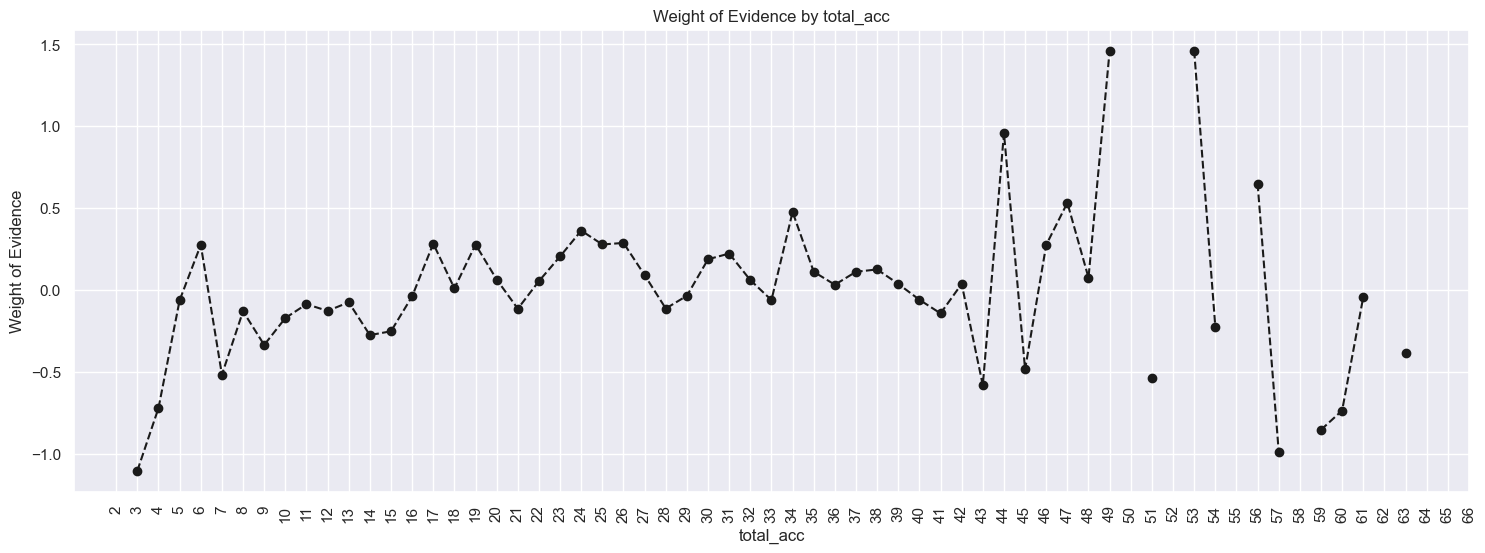

In [101]:
plot_by_woe(df_temp,90)

In [102]:
df_inputs_prep['total_acc_factor : 0-3'] = np.where(df_inputs_prep['total_acc'].isin(range(0,4)), 1, 0)
df_inputs_prep['total_acc_factor : 4-8'] = np.where(df_inputs_prep['total_acc'].isin(range(4,9)), 1, 0)
df_inputs_prep['total_acc_factor : 9-27'] = np.where(df_inputs_prep['total_acc'].isin(range(9,28)), 1, 0)
df_inputs_prep['total_acc_factor : 28-39'] = np.where(df_inputs_prep['total_acc'].isin(range(28,40)), 1, 0)
df_inputs_prep['total_acc_factor : 40-49'] = np.where(df_inputs_prep['total_acc'].isin(range(40,50)), 1, 0)
df_inputs_prep['total_acc_factor : >=50'] = np.where(df_inputs_prep['total_acc'].isin(range(50,)), 1, 0)

In [103]:
df_temp = woe_ordered_continous(df_inputs_prep,'acc_now_delinq',df_targets_prep)
df_temp

acc_now_delinq  n_obs  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  \
0               0   7944   0.862286         1.0  6850.0  1094.0          1.0   

   prop_n_bad  WoE  diff_prop_good  diff_WoE   IV  
0         1.0  0.0             NaN       NaN  0.0

In [104]:
df_inputs_prep['acc_now_delinq_factor : 0'] = np.where(df_inputs_prep['acc_now_delinq'].isin([0]), 1, 0)

#### 11 . Processing continous variable : int_rate

In [105]:
df_inputs_prep['int_rate']

18340    11.11%
8413     10.59%
14612    13.99%
33544    11.83%
1829     10.65%
14844    10.99%
34557    13.57%
25254    17.56%
12880    11.49%
953       7.51%
30474    13.11%
34071    14.61%
30114    12.73%
36866    16.00%
25144    15.21%
32843    11.48%
30551    10.62%
37673    14.42%
27075    16.32%
30747     7.14%
6271     10.65%
9758     13.99%
36178    11.89%
15421     6.99%
20509    11.11%
1670     11.71%
38752     9.76%
34305    15.65%
26085     7.51%
30229    14.22%
38016    12.84%
14686    22.48%
1451     14.65%
5053     13.49%
34864     7.74%
33684    11.83%
32777    12.18%
13637     6.99%
26843     7.14%
9064     11.49%
22214    15.57%
8555     13.49%
13064    10.99%
28987    13.98%
27866     7.51%
655      17.27%
8305     23.22%
4867      6.03%
5040      6.03%
32895    13.57%
34378    12.53%
7403      8.90%
16836     7.29%
10152    18.39%
12574    11.49%
29982     7.88%
2269     10.65%
12928     9.99%
10183     8.49%
28713    13.98%
16551    14.17%
7845     11.99%
33550   

In [106]:
df_inputs_prep['int_rate'] = df_inputs_prep['int_rate'].str.rstrip('%').astype(float)
df_inputs_prep['int_rate'] = pd.to_numeric(df_inputs_prep['int_rate'])

In [107]:
df_inputs_prep['int_rate_factor'] = pd.cut(df_inputs_prep['int_rate'],50)

In [108]:
df_temp = woe_ordered_continous(df_inputs_prep,'int_rate_factor',df_targets_prep)
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (5.402, 5.79]    112   0.955357    0.014099   107.0    5.0   
1       (5.79, 6.16]    233   0.974249    0.029330   227.0    6.0   
2      (6.16, 6.529]     65   0.984615    0.008182    64.0    1.0   
3     (6.529, 6.899]    165   0.939394    0.020770   155.0   10.0   
4     (6.899, 7.269]    259   0.965251    0.032603   250.0    9.0   
5     (7.269, 7.639]    390   0.958974    0.049094   374.0   16.0   
6     (7.639, 8.009]    427   0.948478    0.053751   405.0   22.0   
7     (8.009, 8.378]     12   0.833333    0.001511    10.0    2.0   
8     (8.378, 8.748]    158   0.924051    0.019889   146.0   12.0   
9     (8.748, 9.118]    164   0.878049    0.020645   144.0   20.0   
10    (9.118, 9.488]     87   0.942529    0.010952    82.0    5.0   
11    (9.488, 9.858]    141   0.851064    0.017749   120.0   21.0   
12   (9.858, 10.227]    287   0.891986    0.036128   256.0   31.0   
13  (10.227, 10.597]    317   0.899054    0.039904   285.0   32.0   
14  (10.597, 10.967]    277   0.888087    0.034869   246.0   31.0   
15  (10.967, 11.337]    363   0.881543    0.045695   320.0   43.0   
16  (11.337, 11.707]    277   0.866426    0.034869   240.0   37.0   
17  (11.707, 12.076]    416   0.896635    0.052367   373.0   43.0   
18  (12.076, 12.446]    215   0.860465    0.027064   185.0   30.0   
19  (12.446, 12.816]    291   0.841924    0.036631   245.0   46.0   
20  (12.816, 13.186]    318   0.864780    0.040030   275.0   43.0   
21  (13.186, 13.556]    389   0.848329    0.048968   330.0   59.0   
22  (13.556, 13.925]    216   0.847222    0.027190   183.0   33.0   
23  (13.925, 14.295]    286   0.800699    0.036002   229.0   57.0   
24  (14.295, 14.665]    161   0.850932    0.020267   137.0   24.0   
25  (14.665, 15.035]    206   0.820388    0.025932   169.0   37.0   
26  (15.035, 15.405]    239   0.803347    0.030086   192.0   47.0   
27  (15.405, 15.774]    168   0.833333    0.021148   140.0   28.0   
28  (15.774, 16.144]    198   0.782828    0.024924   155.0   43.0   
29  (16.144, 16.514]    163   0.742331    0.020519   121.0   42.0   
30  (16.514, 16.884]    103   0.757282    0.012966    78.0   25.0   
31  (16.884, 17.254]     86   0.779070    0.010826    67.0   19.0   
32  (17.254, 17.623]    172   0.726744    0.021652   125.0   47.0   
33  (17.623, 17.993]     64   0.656250    0.008056    42.0   22.0   
34  (17.993, 18.363]     65   0.769231    0.008182    50.0   15.0   
35  (18.363, 18.733]    109   0.715596    0.013721    78.0   31.0   
36  (18.733, 19.103]     62   0.758065    0.007805    47.0   15.0   
37  (19.103, 19.472]     71   0.774648    0.008938    55.0   16.0   
38  (19.472, 19.842]     34   0.705882    0.004280    24.0   10.0   
39  (19.842, 20.212]     30   0.700000    0.003776    21.0    9.0   
40  (20.212, 20.582]     41   0.658537    0.005161    27.0   14.0   
41  (20.582, 20.952]     34   0.588235    0.004280    20.0   14.0   
42  (20.952, 21.321]     21   0.761905    0.002644    16.0    5.0   
43  (21.321, 21.691]     15   0.800000    0.001888    12.0    3.0   
44  (21.691, 22.061]     13   0.692308    0.001636     9.0    4.0   
45  (22.061, 22.431]     11   0.454545    0.001385     5.0    6.0   
46  (22.431, 22.801]      7   0.571429    0.000881     4.0    3.0   
47   (22.801, 23.17]      1   1.000000    0.000126     1.0    0.0   
48    (23.17, 23.54]      2   0.500000    0.000252     1.0    1.0   
49    (23.54, 23.91]      3   1.000000    0.000378     3.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.015620    0.004570  1.228983             NaN       NaN  inf  
1      0.033139    0.005484  1.798783        0.018892  0.569800  inf  
2      0.009343    0.000914  2.324475        0.010366  0.525693  inf  
3      0.022628    0.009141  0.906432        0.045221  1.418043  inf  
4      0.036496    0.008227  1.489828        0.025857  0.583396  inf  
5      0.054599    0.014625  1.317259        0.006277  0.17

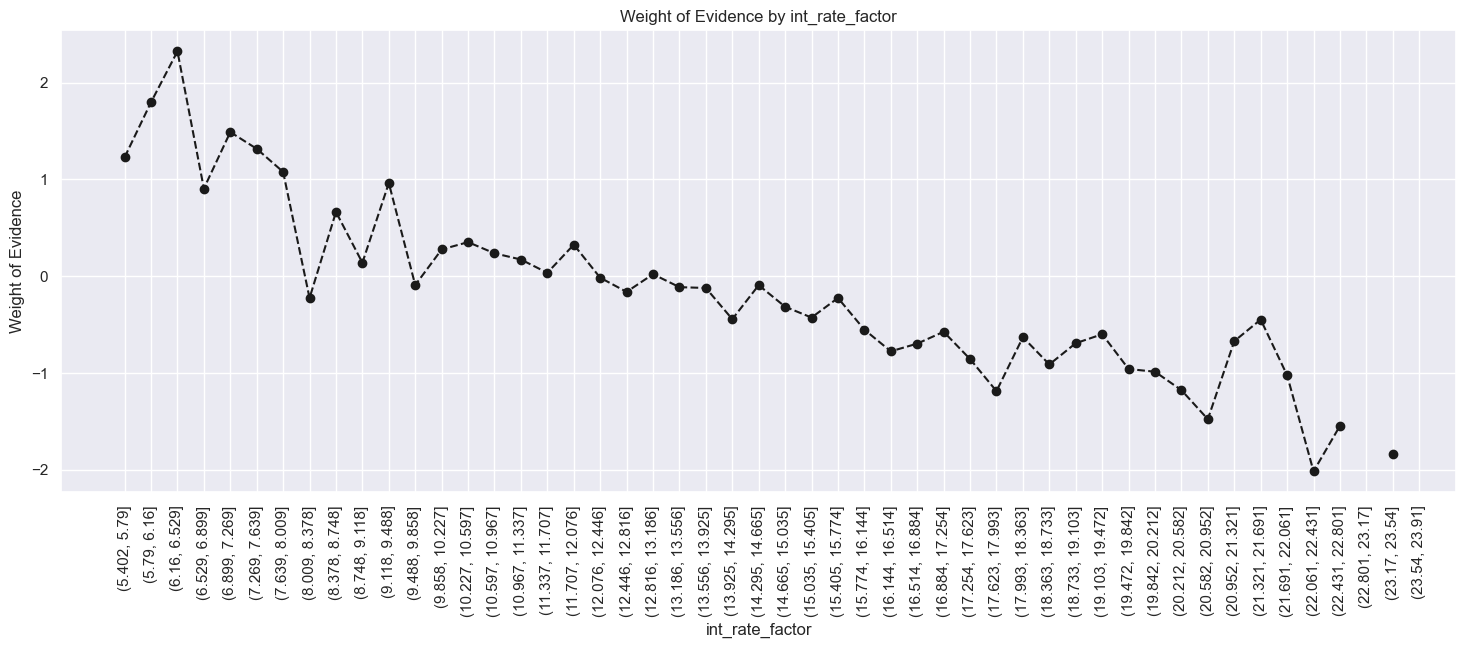

In [109]:
plot_by_woe(df_temp,90)

In [110]:
df_inputs_prep['int_rate_factor : >6.179'] = np.where((df_inputs_prep['int_rate'] <= 6.179), 1, 0)
df_inputs_prep['int_rate_factor : 6.179-6.559'] = np.where((df_inputs_prep['int_rate'] > 6.179) & (df_inputs_prep['int_rate'] <= 6.559), 1, 0)
df_inputs_prep['int_rate_factor : 6.559-8.077'] = np.where((df_inputs_prep['int_rate'] > 5.559) & (df_inputs_prep['int_rate'] <= 8.077), 1, 0)
df_inputs_prep['int_rate_factor : 8.077-11.494'] = np.where((df_inputs_prep['int_rate'] > 8.077) & (df_inputs_prep['int_rate'] <= 11.494), 1, 0)
df_inputs_prep['int_rate_factor : 11.494-16.049'] = np.where((df_inputs_prep['int_rate'] > 11.494) & (df_inputs_prep['int_rate'] <= 16.049), 1, 0)
df_inputs_prep['int_rate_factor : 16.049-18.706'] = np.where((df_inputs_prep['int_rate'] > 16.428) & (df_inputs_prep['int_rate'] <= 18.706), 1, 0)
df_inputs_prep['int_rate_factor : >18.706'] = np.where((df_inputs_prep['int_rate'] > 24.02), 1, 0)

#### 12 . Processing continous variable : annual_inc

In [111]:
df_inputs_prep['annual_inc_factor'] = pd.cut(df_inputs_prep['annual_inc'],100)

In [112]:
df_temp = woe_ordered_continous(df_inputs_prep,'annual_inc_factor',df_targets_prep)
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0        (2804.0, 15960.0]    126   0.793651    0.015861   100.0   26.0   
1       (15960.0, 27920.0]    518   0.816602    0.065206   423.0   95.0   
2       (27920.0, 39880.0]   1110   0.817117    0.139728   907.0  203.0   
3       (39880.0, 51840.0]   1518   0.855731    0.191088  1299.0  219.0   
4       (51840.0, 63800.0]   1262   0.864501    0.158862  1091.0  171.0   
5       (63800.0, 75760.0]   1038   0.871869    0.130665   905.0  133.0   
6       (75760.0, 87720.0]    667   0.886057    0.083963   591.0   76.0   
7       (87720.0, 99680.0]    479   0.903967    0.060297   433.0   46.0   
8      (99680.0, 111640.0]    366   0.896175    0.046073   328.0   38.0   
9     (111640.0, 123600.0]    233   0.896996    0.029330   209.0   24.0   
10    (123600.0, 135560.0]    199   0.889447    0.025050   177.0   22.0   
11    (135560.0, 147520.0]     94   0.936170    0.011833    88.0    6.0   
12    (147520.0, 159480.0]     71   0.873239    0.008938    62.0    9.0   
13    (159480.0, 171440.0]     66   0.878788    0.008308    58.0    8.0   
14    (171440.0, 183400.0]     45   0.911111    0.005665    41.0    4.0   
15    (183400.0, 195360.0]     27   0.777778    0.003399    21.0    6.0   
16    (195360.0, 207320.0]     28   0.964286    0.003525    27.0    1.0   
17    (207320.0, 219280.0]      7   1.000000    0.000881     7.0    0.0   
18    (219280.0, 231240.0]     21   0.809524    0.002644    17.0    4.0   
19    (231240.0, 243200.0]      2   1.000000    0.000252     2.0    0.0   
20    (243200.0, 255160.0]     20   0.900000    0.002518    18.0    2.0   
21    (255160.0, 267120.0]      5   1.000000    0.000629     5.0    0.0   
22    (267120.0, 279080.0]      3   1.000000    0.000378     3.0    0.0   
23    (279080.0, 291040.0]      3   1.000000    0.000378     3.0    0.0   
24    (291040.0, 303000.0]     10   0.900000    0.001259     9.0    1.0   
25    (303000.0, 314960.0]      1   1.000000    0.000126     1.0    0.0   
26    (314960.0, 326920.0]      1   1.000000    0.000126     1.0    0.0   
27    (326920.0, 338880.0]      1   1.000000    0.000126     1.0    0.0   
28    (338880.0, 350840.0]      3   1.000000    0.000378     3.0    0.0   
29    (350840.0, 362800.0]      1   1.000000    0.000126     1.0    0.0   
30    (362800.0, 374760.0]      2   1.000000    0.000252     2.0    0.0   
31    (374760.0, 386720.0]      2   1.000000    0.000252     2.0    0.0   
32    (386720.0, 398680.0]      0        NaN    0.000000     NaN    NaN   
33    (398680.0, 410640.0]      3   1.000000    0.000378     3.0    0.0   
34    (410640.0, 422600.0]      1   1.000000    0.000126     1.0    0.0   
35    (422600.0, 434560.0]      0        NaN    0.000000     NaN    NaN   
36    (434560.0, 446520.0]      2   1.000000    0.000252     2.0    0.0   
37    (446520.0, 458480.0]      0        NaN    0.000000     NaN    NaN   
38    (458480.0, 470440.0]      0        NaN    0.000000     NaN    NaN   
39    (470440.0, 482400.0]      0        NaN    0.000000     NaN    NaN   
40    (482400.0, 494360.0]      0        NaN    0.000000     NaN    NaN   
41    (494360.0, 506320.0]      1   1.000000    0.000126     1.0    0.0   
42    (506320.0, 518280.0]      0        NaN    0.000000     NaN    NaN   
43    (518280.0, 530240.0]      0        NaN    0.000000     NaN    NaN   
44    (530240.0, 542200.0]      0        NaN    0.000000     NaN    NaN   
45    (542200.0, 554160.0]      2   1.000000    0.000252     2.0    0.0   
46    (554160.0, 566120.0]      0        NaN    0.000000     NaN    NaN   
47    (566120.0, 578080.0]      0        NaN    0.000000     NaN    NaN   
48    (578080.0, 590040.0]      1   1.000000    0.000126     1.0    0.0   
49    (590040.0, 602000.0]      0        NaN    0.000000     NaN    NaN   
50    (602000.0, 613960.0]      0        NaN    0.000000     NaN    NaN   
51    (613960.0, 625920.0]      0        NaN    0.000000     NaN    NaN   
52    (625920.0, 637880.0]      0 

In [113]:
df_inputs_prep_temp = df_inputs_prep.loc[df_inputs_prep['annual_inc'] <= 123920, : ]

In [114]:
df_inputs_prep_temp['annual_inc_factor'] = pd.cut(df_inputs_prep_temp['annual_inc'],50)
df_temp = woe_ordered_continous(df_inputs_prep_temp,'annual_inc_factor',df_targets_prep[df_inputs_prep_temp.index])
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (3880.856, 6382.88]      5   1.000000    0.000683     5.0    0.0   
1       (6382.88, 8765.76]      6   1.000000    0.000820     6.0    0.0   
2      (8765.76, 11148.64]     23   0.565217    0.003143    13.0   10.0   
3     (11148.64, 13531.52]     33   0.818182    0.004510    27.0    6.0   
4      (13531.52, 15914.4]     59   0.830508    0.008063    49.0   10.0   
5      (15914.4, 18297.28]     58   0.758621    0.007927    44.0   14.0   
6     (18297.28, 20680.16]     78   0.884615    0.010660    69.0    9.0   
7     (20680.16, 23063.04]     86   0.732558    0.011753    63.0   23.0   
8     (23063.04, 25445.92]    185   0.837838    0.025284   155.0   30.0   
9      (25445.92, 27828.8]    108   0.824074    0.014760    89.0   19.0   
10     (27828.8, 30211.68]    277   0.870036    0.037857   241.0   36.0   
11    (30211.68, 32594.56]    156   0.807692    0.021320   126.0   30.0   
12    (32594.56, 34977.44]    145   0.779310    0.019817   113.0   32.0   
13    (34977.44, 37360.32]    344   0.793605    0.047014   273.0   71.0   
14     (37360.32, 39743.2]    188   0.819149    0.025694   154.0   34.0   
15     (39743.2, 42126.08]    416   0.853365    0.056854   355.0   61.0   
16    (42126.08, 44508.96]    166   0.885542    0.022687   147.0   19.0   
17    (44508.96, 46891.84]    292   0.849315    0.039907   248.0   44.0   
18    (46891.84, 49274.72]    280   0.882143    0.038267   247.0   33.0   
19     (49274.72, 51657.6]    366   0.830601    0.050021   304.0   62.0   
20     (51657.6, 54040.48]    269   0.840149    0.036764   226.0   43.0   
21    (54040.48, 56423.36]    229   0.873362    0.031297   200.0   29.0   
22    (56423.36, 58806.24]    164   0.878049    0.022414   144.0   20.0   
23    (58806.24, 61189.12]    413   0.869249    0.056444   359.0   54.0   
24     (61189.12, 63572.0]    184   0.869565    0.025147   160.0   24.0   
25     (63572.0, 65954.88]    246   0.869919    0.033620   214.0   32.0   
26    (65954.88, 68337.76]    154   0.883117    0.021047   136.0   18.0   
27    (68337.76, 70720.64]    249   0.891566    0.034030   222.0   27.0   
28    (70720.64, 73103.52]    178   0.887640    0.024327   158.0   20.0   
29     (73103.52, 75486.4]    211   0.824645    0.028837   174.0   37.0   
30     (75486.4, 77869.28]     80   0.875000    0.010933    70.0   10.0   
31    (77869.28, 80252.16]    250   0.884000    0.034167   221.0   29.0   
32    (80252.16, 82635.04]     73   0.835616    0.009977    61.0   12.0   
33    (82635.04, 85017.92]    208   0.913462    0.028427   190.0   18.0   
34     (85017.92, 87400.8]     53   0.867925    0.007243    46.0    7.0   
35     (87400.8, 89783.68]     58   0.896552    0.007927    52.0    6.0   
36    (89783.68, 92166.56]    186   0.892473    0.025420   166.0   20.0   
37    (92166.56, 94549.44]     53   0.811321    0.007243    43.0   10.0   
38    (94549.44, 96932.32]    126   0.976190    0.017220   123.0    3.0   
39     (96932.32, 99315.2]     59   0.881356    0.008063    52.0    7.0   
40    (99315.2, 101698.08]    134   0.925373    0.018314   124.0   10.0   
41  (101698.08, 104080.96]     58   0.879310    0.007927    51.0    7.0   
42  (104080.96, 106463.84]     63   0.888889    0.008610    56.0    7.0   
43  (106463.84, 108846.72]     40   0.875000    0.005467    35.0    5.0   
44   (108846.72, 111229.6]     75   0.880000    0.010250    66.0    9.0   
45   (111229.6, 113612.48]     28   0.892857    0.003827    25.0    3.0   
46  (113612.48, 115995.36]     53   0.943396    0.007243    50.0    3.0   
47  (115995.36, 118378.24]     25   0.880000    0.003417    22.0    3.0   
48  (118378.24, 120761.12]    109   0.871560    0.014897    95.0   14.0   
49   (120761.12, 123144.0]     18   0.944444    0.002460    17.0    1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.000795    0.000000       inf             NaN       NaN  inf  
1      0.000955    0.000000       inf    

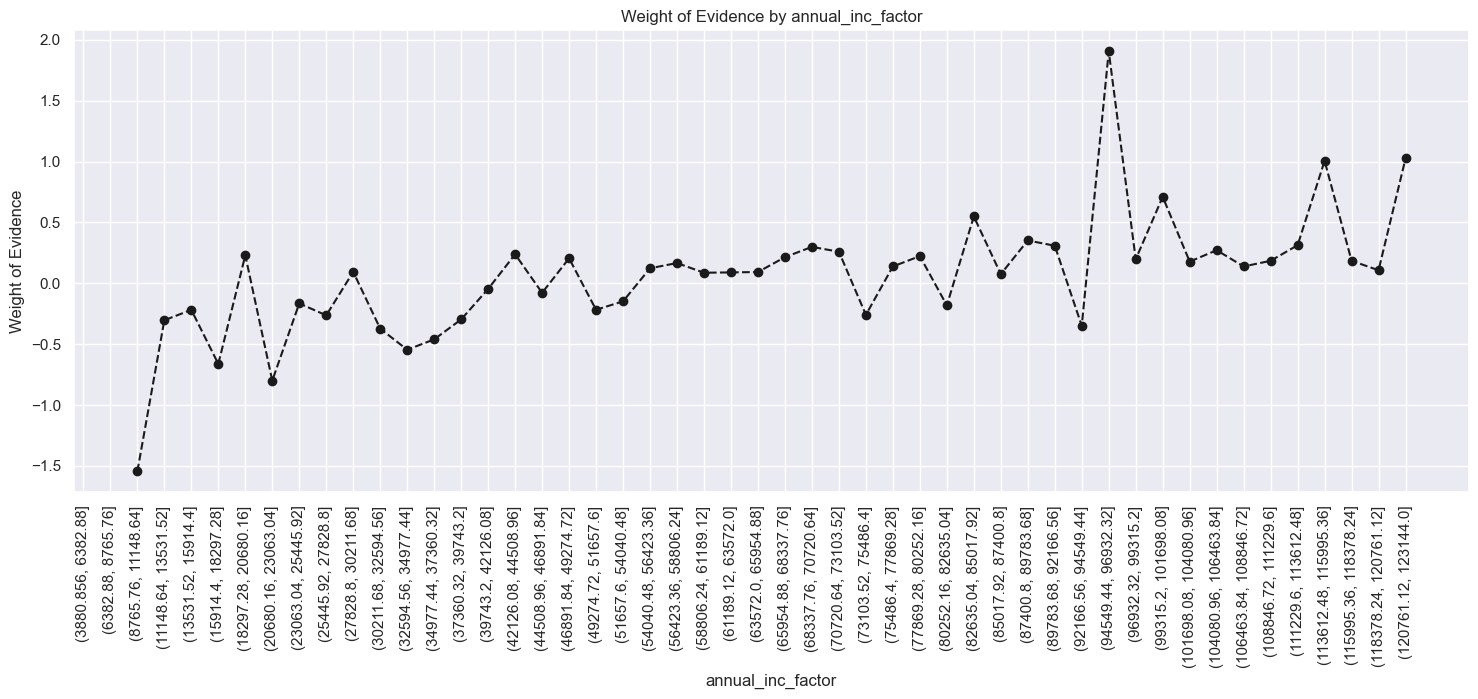

In [115]:
plot_by_woe(df_temp,90)

In [116]:
df_inputs_prep['annual_inc_factor : < 20K'] = np.where((df_inputs_prep['annual_inc'] <= 20000), 1, 0)
df_inputs_prep['annual_inc_factor : 20K-30K'] = np.where((df_inputs_prep['annual_inc'] > 20000) & (df_inputs_prep['annual_inc'] <= 30000), 1, 0)
df_inputs_prep['annual_inc_factor : 30K-40K'] = np.where((df_inputs_prep['annual_inc'] > 30000) & (df_inputs_prep['annual_inc'] <= 40000), 1, 0)
df_inputs_prep['annual_inc_factor : 40K-50K'] = np.where((df_inputs_prep['annual_inc'] > 40000) & (df_inputs_prep['annual_inc'] <= 50000), 1, 0)
df_inputs_prep['annual_inc_factor : 50K-60K'] = np.where((df_inputs_prep['annual_inc'] > 50000) & (df_inputs_prep['annual_inc'] <= 60000), 1, 0)
df_inputs_prep['annual_inc_factor : 60K-70K'] = np.where((df_inputs_prep['annual_inc'] > 60000) & (df_inputs_prep['annual_inc'] <= 70000), 1, 0)
df_inputs_prep['annual_inc_factor : 70K-80K'] = np.where((df_inputs_prep['annual_inc'] > 70000) & (df_inputs_prep['annual_inc'] <= 80000), 1, 0)
df_inputs_prep['annual_inc_factor : 80K-90K'] = np.where((df_inputs_prep['annual_inc'] > 80000) & (df_inputs_prep['annual_inc'] <= 90000), 1, 0)
df_inputs_prep['annual_inc_factor : 90K-100K'] = np.where((df_inputs_prep['annual_inc'] > 90000) & (df_inputs_prep['annual_inc'] <= 100000), 1, 0)
df_inputs_prep['annual_inc_factor : 100K-120K'] = np.where((df_inputs_prep['annual_inc'] > 100000) & (df_inputs_prep['annual_inc'] <= 120000), 1, 0)
df_inputs_prep['annual_inc_factor : 120K-180K'] = np.where((df_inputs_prep['annual_inc'] > 120000) & (df_inputs_prep['annual_inc'] <= 180000), 1, 0)
df_inputs_prep['annual_inc_factor : > 180K'] = np.where((df_inputs_prep['annual_inc'] > 180000), 1, 0)

#### 13 . Processing continous variable : dti

In [117]:
df_inputs_prep['dti']

18340     9.62
8413      7.71
14612    10.95
33544     0.00
1829     21.58
14844     5.71
34557    13.45
25254    16.92
12880     7.69
953      10.00
30474    20.99
34071    12.59
30114    16.72
36866    15.88
25144     6.17
32843    21.53
30551    23.04
37673     6.78
27075    13.45
30747     2.34
6271     24.08
9758     20.04
36178    15.44
15421    10.37
20509     7.16
1670      2.10
38752    18.38
34305    18.90
26085    16.83
30229    16.99
38016    20.23
14686    14.83
1451     15.98
5053      5.35
34864     7.27
33684    11.42
32777    13.56
13637    25.29
26843    10.16
9064     14.12
22214     9.17
8555     12.81
13064    10.92
28987    13.63
27866    14.13
655      10.85
8305     21.47
4867     14.73
5040     15.54
32895     6.45
34378    22.74
7403     17.28
16836    19.05
10152    15.03
12574    23.61
29982    13.82
2269     21.06
12928     5.28
10183    19.95
28713    11.85
16551     2.49
7845     13.21
33550    11.90
20888    16.29
33861    18.22
6879      7.44
3242      

In [118]:
df_temp = woe_ordered_continous(df_inputs_prep,'dti',df_targets_prep)
df_temp

dti  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0      0.00     33   0.757576    0.004154    25.0    8.0     0.003650   
1      0.01      1   0.000000    0.000126     0.0    1.0     0.000000   
2      0.02      1   1.000000    0.000126     1.0    0.0     0.000146   
3      0.05      1   1.000000    0.000126     1.0    0.0     0.000146   
4      0.08      1   1.000000    0.000126     1.0    0.0     0.000146   
5      0.12      1   1.000000    0.000126     1.0    0.0     0.000146   
6      0.13      1   1.000000    0.000126     1.0    0.0     0.000146   
7      0.14      1   1.000000    0.000126     1.0    0.0     0.000146   
8      0.15      2   1.000000    0.000252     2.0    0.0     0.000292   
9      0.16      2   1.000000    0.000252     2.0    0.0     0.000292   
10     0.18      2   1.000000    0.000252     2.0    0.0     0.000292   
11     0.19      1   1.000000    0.000126     1.0    0.0     0.000146   
12     0.20      3   1.000000    0.000378     3.0    0.0     0.000438   
13     0.21      1   1.000000    0.000126     1.0    0.0     0.000146   
14     0.22      3   1.000000    0.000378     3.0    0.0     0.000438   
15     0.24      2   1.000000    0.000252     2.0    0.0     0.000292   
16     0.25      4   1.000000    0.000504     4.0    0.0     0.000584   
17     0.27      1   1.000000    0.000126     1.0    0.0     0.000146   
18     0.28      3   1.000000    0.000378     3.0    0.0     0.000438   
19     0.30      1   1.000000    0.000126     1.0    0.0     0.000146   
20     0.31      2   1.000000    0.000252     2.0    0.0     0.000292   
21     0.32      1   1.000000    0.000126     1.0    0.0     0.000146   
22     0.33      3   0.666667    0.000378     2.0    1.0     0.000292   
23     0.34      1   1.000000    0.000126     1.0    0.0     0.000146   
24     0.35      1   1.000000    0.000126     1.0    0.0     0.000146   
25     0.38      2   1.000000    0.000252     2.0    0.0     0.000292   
26     0.39      2   1.000000    0.000252     2.0    0.0     0.000292   
27     0.40      2   1.000000    0.000252     2.0    0.0     0.000292   
28     0.41      1   1.000000    0.000126     1.0    0.0     0.000146   
29     0.42      1   1.000000    0.000126     1.0    0.0     0.000146   
30     0.43      1   1.000000    0.000126     1.0    0.0     0.000146   
31     0.44      2   1.000000    0.000252     2.0    0.0     0.000292   
32     0.45      4   0.750000    0.000504     3.0    1.0     0.000438   
33     0.47      1   1.000000    0.000126     1.0    0.0     0.000146   
34     0.48      3   1.000000    0.000378     3.0    0.0     0.000438   
35     0.50      2   1.000000    0.000252     2.0    0.0     0.000292   
36     0.52      2   0.500000    0.000252     1.0    1.0     0.000146   
37     0.53      1   0.000000    0.000126     0.0    1.0     0.000000   
38     0.54      3   1.000000    0.000378     3.0    0.0     0.000438   
39     0.55      2   1.000000    0.000252     2.0    0.0     0.000292   
40     0.56      3   1.000000    0.000378     3.0    0.0     0.000438   
41     0.57      1   1.000000    0.000126     1.0    0.0     0.000146   
42     0.58      4   0.750000    0.000504     3.0    1.0     0.000438   
43     0.60      7   1.000000    0.000881     7.0    0.0     0.001022   
44     0.61      3   1.000000    0.000378     3.0    0.0     0.000438   
45     0.62      1   1.000000    0.000126     1.0    0.0     0.000146   
46     0.63      1   1.000000    0.000126     1.0    0.0     0.000146   
47     0.64      1   1.000000    0.000126     1.0    0.0     0.000146   
48     0.65      1   1.000000    0.000126     1.0    0.0     0.000146   
49     0.67      3   0.333333    0.000378     1.0    2.0     0.000146   
50     0.68      1   1.000000    0.000126     1.0    0.0     0.000146   
51     0.69      2   1.000000    0.000252     2.0    0.0     0.000292   
52     0.70      4   1.000000    0.000504     4.0    0.0     0.000584   
53     0.71      2   1.000000    0.000252     2.0    0.0     0.000

In [119]:
df_inputs_prep['dti_factor'] = pd.cut(df_inputs_prep['dti'],50)

In [120]:
df_temp = woe_ordered_continous(df_inputs_prep,'dti_factor',df_targets_prep)
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.03, 0.6]    110   0.872727    0.013847    96.0   14.0   
1         (0.6, 1.2]    110   0.890909    0.013847    98.0   12.0   
2       (1.2, 1.799]    106   0.905660    0.013343    96.0   10.0   
3     (1.799, 2.399]    109   0.917431    0.013721   100.0    9.0   
4     (2.399, 2.999]    104   0.875000    0.013092    91.0   13.0   
5     (2.999, 3.599]    119   0.899160    0.014980   107.0   12.0   
6     (3.599, 4.199]    146   0.876712    0.018379   128.0   18.0   
7     (4.199, 4.798]    158   0.867089    0.019889   137.0   21.0   
8     (4.798, 5.398]    164   0.914634    0.020645   150.0   14.0   
9     (5.398, 5.998]    155   0.858065    0.019512   133.0   22.0   
10    (5.998, 6.598]    187   0.860963    0.023540   161.0   26.0   
11    (6.598, 7.198]    181   0.867403    0.022784   157.0   24.0   
12    (7.198, 7.797]    205   0.887805    0.025806   182.0   23.0   
13    (7.797, 8.397]    197   0.883249    0.024799   174.0   23.0   
14    (8.397, 8.997]    211   0.876777    0.026561   185.0   26.0   
15    (8.997, 9.597]    223   0.829596    0.028072   185.0   38.0   
16   (9.597, 10.197]    234   0.876068    0.029456   205.0   29.0   
17  (10.197, 10.796]    247   0.910931    0.031093   225.0   22.0   
18  (10.796, 11.396]    229   0.882096    0.028827   202.0   27.0   
19  (11.396, 11.996]    231   0.900433    0.029079   208.0   23.0   
20  (11.996, 12.596]    250   0.832000    0.031470   208.0   42.0   
21  (12.596, 13.196]    247   0.854251    0.031093   211.0   36.0   
22  (13.196, 13.795]    246   0.861789    0.030967   212.0   34.0   
23  (13.795, 14.395]    232   0.827586    0.029204   192.0   40.0   
24  (14.395, 14.995]    242   0.880165    0.030463   213.0   29.0   
25  (14.995, 15.595]    234   0.876068    0.029456   205.0   29.0   
26  (15.595, 16.195]    193   0.860104    0.024295   166.0   27.0   
27  (16.195, 16.794]    230   0.852174    0.028953   196.0   34.0   
28  (16.794, 17.394]    204   0.857843    0.025680   175.0   29.0   
29  (17.394, 17.994]    224   0.875000    0.028197   196.0   28.0   
30  (17.994, 18.594]    219   0.835616    0.027568   183.0   36.0   
31  (18.594, 19.194]    204   0.862745    0.025680   176.0   28.0   
32  (19.194, 19.793]    231   0.857143    0.029079   198.0   33.0   
33  (19.793, 20.393]    206   0.800971    0.025932   165.0   41.0   
34  (20.393, 20.993]    193   0.875648    0.024295   169.0   24.0   
35  (20.993, 21.593]    177   0.841808    0.022281   149.0   28.0   
36  (21.593, 22.193]    166   0.843373    0.020896   140.0   26.0   
37  (22.193, 22.792]    195   0.851282    0.024547   166.0   29.0   
38  (22.792, 23.392]    146   0.794521    0.018379   116.0   30.0   
39  (23.392, 23.992]    136   0.786765    0.017120   107.0   29.0   
40  (23.992, 24.592]    126   0.841270    0.015861   106.0   20.0   
41  (24.592, 25.192]    106   0.792453    0.013343    84.0   22.0   
42  (25.192, 25.791]     13   0.846154    0.001636    11.0    2.0   
43  (25.791, 26.391]     19   0.842105    0.002392    16.0    3.0   
44  (26.391, 26.991]     18   0.944444    0.002266    17.0    1.0   
45  (26.991, 27.591]     17   0.705882    0.002140    12.0    5.0   
46  (27.591, 28.191]     13   1.000000    0.001636    13.0    0.0   
47   (28.191, 28.79]     12   0.833333    0.001511    10.0    2.0   
48    (28.79, 29.39]     13   0.923077    0.001636    12.0    1.0   
49    (29.39, 29.99]      6   1.000000    0.000755     6.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.014015    0.012797  0.090883             NaN       NaN  inf  
1      0.014307    0.010969  0.265653        0.018182  0.174770  inf  
2      0.014015    0.009141  0.427355        0.014751  0.161702  inf  
3      0.014599    0.008227  0.573538        0.011771  0.146183  inf  
4      0.013285    0.011883  0.111502        0.042431  0.462035  inf  
5      0.015620    0.010969  0.353514        0.024160  0.242012 

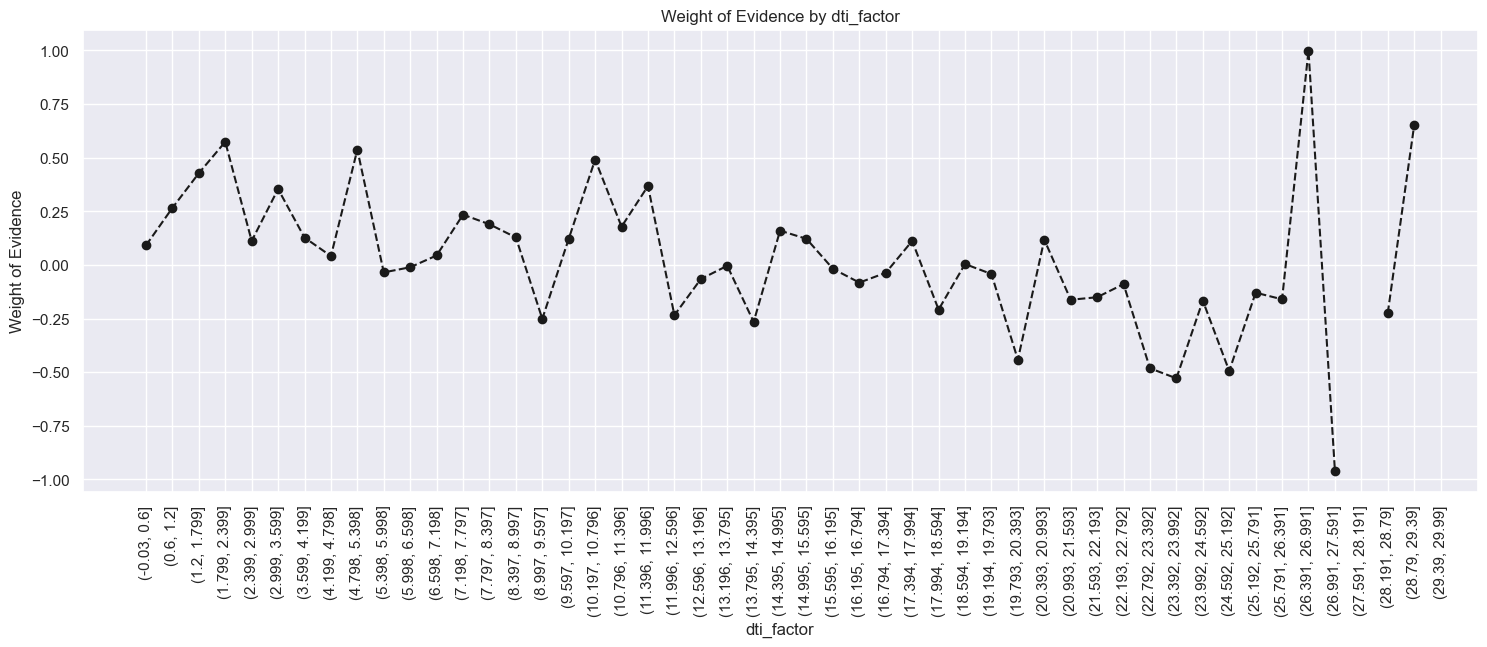

In [121]:
plot_by_woe(df_temp,90)

In [122]:
df_inputs_prep['dti_factor : < 1'] = np.where((df_inputs_prep['dti'] <=1), 1, 0)
df_inputs_prep['dti_factor : 1-5'] = np.where((df_inputs_prep['dti'] > 1) & (df_inputs_prep['dti'] <= 5), 1, 0)
df_inputs_prep['dti_factor : 5-7'] = np.where((df_inputs_prep['dti'] > 5) & (df_inputs_prep['dti'] <= 7), 1, 0)
df_inputs_prep['dti_factor : 7-14'] = np.where((df_inputs_prep['dti'] > 7) & (df_inputs_prep['dti'] <= 14), 1, 0)
df_inputs_prep['dti_factor : 14-16'] = np.where((df_inputs_prep['dti'] > 14) & (df_inputs_prep['dti'] <= 16), 1, 0)
df_inputs_prep['dti_factor : 16-20'] = np.where((df_inputs_prep['dti'] > 16) & (df_inputs_prep['dti'] <= 20), 1, 0)
df_inputs_prep['dti_factor : 20-24'] = np.where((df_inputs_prep['dti'] > 20) & (df_inputs_prep['dti'] <= 24), 1, 0)
df_inputs_prep['dti_factor : 24-25'] = np.where((df_inputs_prep['dti'] > 24) & (df_inputs_prep['dti'] <= 25), 1, 0)
df_inputs_prep['dti_factor : > 25'] = np.where((df_inputs_prep['dti'] > 25), 1, 0)

#### 14 . Processing continous variable : mths_since_last_delinq

In [123]:
df_inputs_prep_temp = df_inputs_prep[ pd.notnull(df_inputs_prep['mths_since_last_delinq']) ]
df_inputs_prep_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prep_temp['mths_since_last_delinq'],50)
df_temp = woe_ordered_continous(df_inputs_prep_temp,'mths_since_last_delinq_factor',df_targets_prep[df_inputs_prep_temp.index])
df_temp

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.103, 2.06]    111   0.837838    0.040290    93.0   18.0   
1                   (2.06, 4.12]     56   0.839286    0.020327    47.0    9.0   
2                   (4.12, 6.18]     72   0.888889    0.026134    64.0    8.0   
3                   (6.18, 8.24]     68   0.867647    0.024682    59.0    9.0   
4                   (8.24, 10.3]     74   0.797297    0.026860    59.0   15.0   
5                  (10.3, 12.36]     60   0.900000    0.021779    54.0    6.0   
6                 (12.36, 14.42]     65   0.861538    0.023593    56.0    9.0   
7                 (14.42, 16.48]     82   0.865854    0.029764    71.0   11.0   
8                 (16.48, 18.54]     92   0.869565    0.033394    80.0   12.0   
9                  (18.54, 20.6]    103   0.844660    0.037387    87.0   16.0   
10                 (20.6, 22.66]     89   0.808989    0.032305    72.0   17.0   
11                (22.66, 24.72]    100   0.820000    0.036298    82.0   18.0   
12                (24.72, 26.78]     89   0.808989    0.032305    72.0   17.0   
13                (26.78, 28.84]     80   0.837500    0.029038    67.0   13.0   
14                 (28.84, 30.9]     98   0.857143    0.035572    84.0   14.0   
15                 (30.9, 32.96]     87   0.862069    0.031579    75.0   12.0   
16                (32.96, 35.02]    113   0.876106    0.041016    99.0   14.0   
17                (35.02, 37.08]     71   0.845070    0.025771    60.0   11.0   
18                (37.08, 39.14]     73   0.890411    0.026497    65.0    8.0   
19                 (39.14, 41.2]     84   0.892857    0.030490    75.0    9.0   
20                 (41.2, 43.26]     94   0.829787    0.034120    78.0   16.0   
21                (43.26, 45.32]     80   0.800000    0.029038    64.0   16.0   
22                (45.32, 47.38]     90   0.844444    0.032668    76.0   14.0   
23                (47.38, 49.44]     67   0.895522    0.024319    60.0    7.0   
24                 (49.44, 51.5]     45   0.866667    0.016334    39.0    6.0   
25                 (51.5, 53.56]     66   0.878788    0.023956    58.0    8.0   
26                (53.56, 55.62]     42   0.928571    0.015245    39.0    3.0   
27                (55.62, 57.68]     42   0.952381    0.015245    40.0    2.0   
28                (57.68, 59.74]     57   0.877193    0.020690    50.0    7.0   
29                 (59.74, 61.8]     50   0.800000    0.018149    40.0   10.0   
30                 (61.8, 63.86]     59   0.864407    0.021416    51.0    8.0   
31                (63.86, 65.92]     34   0.911765    0.012341    31.0    3.0   
32                (65.92, 67.98]     39   0.846154    0.014156    33.0    6.0   
33                (67.98, 70.04]     72   0.861111    0.026134    62.0   10.0   
34                 (70.04, 72.1]     50   0.860000    0.018149    43.0    7.0   
35                 (72.1, 74.16]     44   0.840909    0.015971    37.0    7.0   
36                (74.16, 76.22]     42   0.976190    0.015245    41.0    1.0   
37                (76.22, 78.28]     40   0.750000    0.014519    30.0   10.0   
38                (78.28, 80.34]     41   0.853659    0.014882    35.0    6.0   
39                 (80.34, 82.4]     30   0.733333    0.010889    22.0    8.0   
40                 (82.4, 84.46]      2   0.500000    0.000726     1.0    1.0   
41                (84.46, 86.52]      1   1.000000    0.000363     1.0    0.0   
42                (86.52, 88.58]      0        NaN    0.000000     NaN    NaN   
43                (88.58, 90.64]      0        NaN    0.000000     NaN    NaN   
44                 (90.64, 92.7]      0        NaN    0.000000     NaN    NaN   
45                 (92.7, 94.76]      0        NaN    0.000000     NaN    NaN   
46                (94.76, 96.82]      0        NaN    0.000000     NaN    NaN   
47                (96.82, 98.88]      0        NaN    0.000000     NaN    NaN   
48               (98.88, 100.94]  

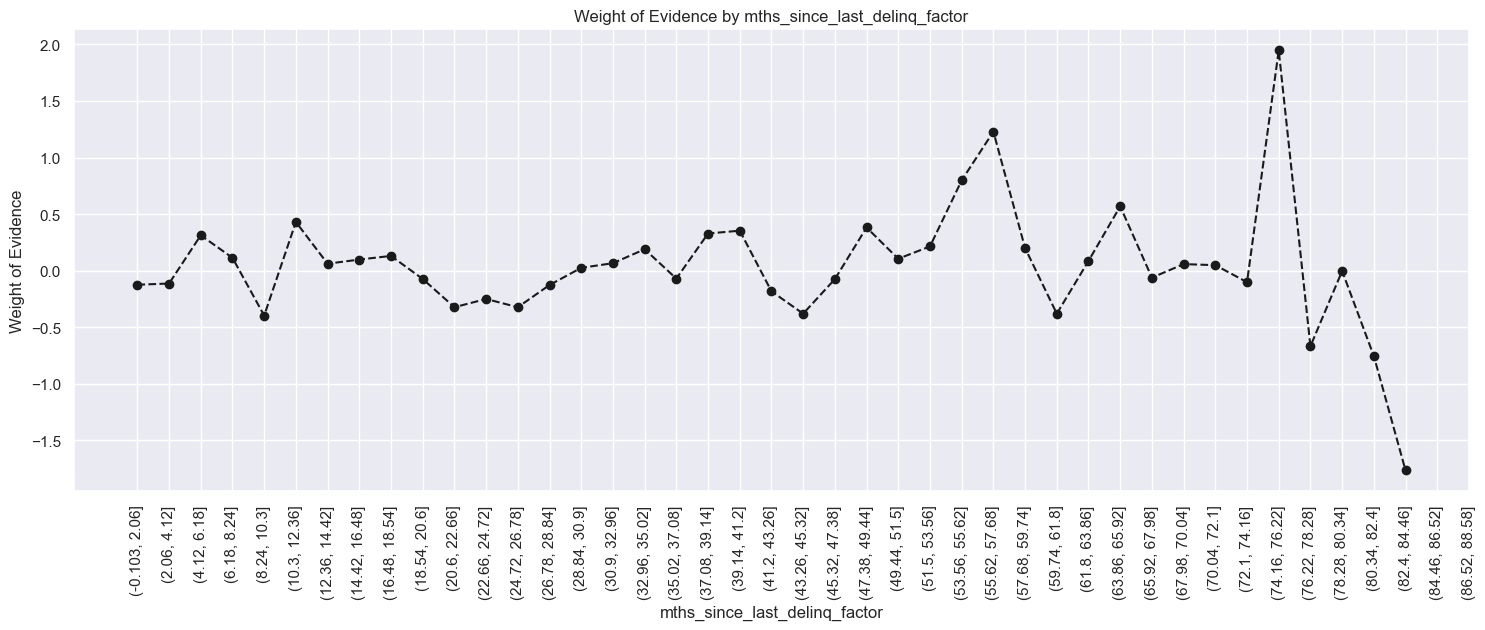

In [124]:
plot_by_woe(df_temp,90)

In [125]:
df_inputs_prep['mths_since_last_delinq_factor : Missing'] = np.where((df_inputs_prep['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prep['mths_since_last_delinq_factor : < 2'] = np.where((df_inputs_prep['mths_since_last_delinq'] <= 2), 1, 0)
df_inputs_prep['mths_since_last_delinq_factor : 3-19'] = np.where((df_inputs_prep['mths_since_last_delinq'] > 3) & (df_inputs_prep['mths_since_last_delinq'] <= 19), 1, 0)
df_inputs_prep['mths_since_last_delinq_factor : 19-38'] = np.where((df_inputs_prep['mths_since_last_delinq'] > 19) & (df_inputs_prep['mths_since_last_delinq'] <= 38), 1, 0)
df_inputs_prep['mths_since_last_delinq_factor : 38-52'] = np.where((df_inputs_prep['mths_since_last_delinq'] > 38) & (df_inputs_prep['mths_since_last_delinq'] <= 52), 1, 0)
df_inputs_prep['mths_since_last_delinq_factor : 52-79'] = np.where((df_inputs_prep['mths_since_last_delinq'] > 52) & (df_inputs_prep['mths_since_last_delinq'] <= 79), 1, 0)
df_inputs_prep['mths_since_last_delinq_factor : > 79'] = np.where((df_inputs_prep['mths_since_last_delinq'] > 79), 1, 0)

#### 15 . Processing continous variable : mths_since_last_record

In [126]:
df_inputs_prep_temp = df_inputs_prep[ pd.notnull(df_inputs_prep['mths_since_last_record']) ]
df_inputs_prep_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prep_temp['mths_since_last_record'],50)
df_temp = woe_ordered_continous(df_inputs_prep_temp,'mths_since_last_record_factor',df_targets_prep[df_inputs_prep_temp.index])
df_temp

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.119, 2.38]    133   0.827068    0.242701   110.0   23.0   
1                   (2.38, 4.76]      0        NaN    0.000000     NaN    NaN   
2                   (4.76, 7.14]      1   1.000000    0.001825     1.0    0.0   
3                   (7.14, 9.52]      0        NaN    0.000000     NaN    NaN   
4                   (9.52, 11.9]      0        NaN    0.000000     NaN    NaN   
5                  (11.9, 14.28]      2   0.500000    0.003650     1.0    1.0   
6                 (14.28, 16.66]      0        NaN    0.000000     NaN    NaN   
7                 (16.66, 19.04]      2   0.500000    0.003650     1.0    1.0   
8                 (19.04, 21.42]      0        NaN    0.000000     NaN    NaN   
9                  (21.42, 23.8]      0        NaN    0.000000     NaN    NaN   
10                 (23.8, 26.18]      2   0.500000    0.003650     1.0    1.0   
11                (26.18, 28.56]      2   1.000000    0.003650     2.0    0.0   
12                (28.56, 30.94]      1   1.000000    0.001825     1.0    0.0   
13                (30.94, 33.32]      2   0.500000    0.003650     1.0    1.0   
14                 (33.32, 35.7]      2   1.000000    0.003650     2.0    0.0   
15                 (35.7, 38.08]      2   0.500000    0.003650     1.0    1.0   
16                (38.08, 40.46]      3   0.666667    0.005474     2.0    1.0   
17                (40.46, 42.84]      4   0.500000    0.007299     2.0    2.0   
18                (42.84, 45.22]      3   0.666667    0.005474     2.0    1.0   
19                 (45.22, 47.6]      0        NaN    0.000000     NaN    NaN   
20                 (47.6, 49.98]      2   1.000000    0.003650     2.0    0.0   
21                (49.98, 52.36]      6   0.833333    0.010949     5.0    1.0   
22                (52.36, 54.74]     11   0.818182    0.020073     9.0    2.0   
23                (54.74, 57.12]      4   1.000000    0.007299     4.0    0.0   
24                 (57.12, 59.5]      2   1.000000    0.003650     2.0    0.0   
25                 (59.5, 61.88]      3   1.000000    0.005474     3.0    0.0   
26                (61.88, 64.26]      5   0.800000    0.009124     4.0    1.0   
27                (64.26, 66.64]      4   0.500000    0.007299     2.0    2.0   
28                (66.64, 69.02]      3   1.000000    0.005474     3.0    0.0   
29                 (69.02, 71.4]      1   1.000000    0.001825     1.0    0.0   
30                 (71.4, 73.78]      4   1.000000    0.007299     4.0    0.0   
31                (73.78, 76.16]      4   1.000000    0.007299     4.0    0.0   
32                (76.16, 78.54]      5   0.400000    0.009124     2.0    3.0   
33                (78.54, 80.92]      5   0.400000    0.009124     2.0    3.0   
34                 (80.92, 83.3]      4   1.000000    0.007299     4.0    0.0   
35                 (83.3, 85.68]     11   0.818182    0.020073     9.0    2.0   
36                (85.68, 88.06]     22   0.909091    0.040146    20.0    2.0   
37                (88.06, 90.44]     17   0.705882    0.031022    12.0    5.0   
38                (90.44, 92.82]     14   0.928571    0.025547    13.0    1.0   
39                 (92.82, 95.2]     31   0.709677    0.056569    22.0    9.0   
40                 (95.2, 97.58]     19   0.894737    0.034672    17.0    2.0   
41                (97.58, 99.96]     28   0.642857    0.051095    18.0   10.0   
42               (99.96, 102.34]     28   0.785714    0.051095    22.0    6.0   
43              (102.34, 104.72]     22   0.772727    0.040146    17.0    5.0   
44               (104.72, 107.1]     26   0.769231    0.047445    20.0    6.0   
45               (107.1, 109.48]     19   0.842105    0.034672    16.0    3.0   
46              (109.48, 111.86]     24   0.750000    0.043796    18.0    6.0   
47              (111.86, 114.24]     27   0.888889    0.049270    24.0    3.0   
48              (114.24, 116.62]  

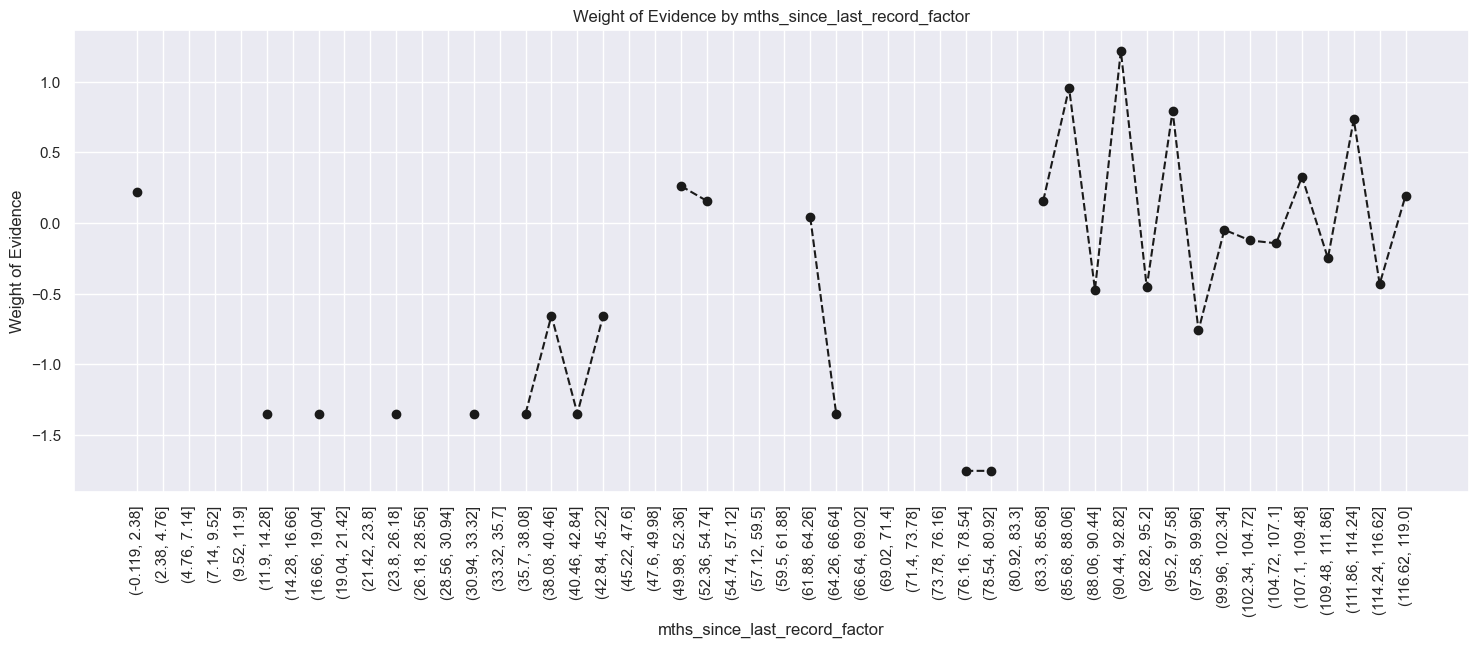

In [127]:
plot_by_woe(df_temp,90)

In [128]:
df_inputs_prep_temp = df_inputs_prep.loc[df_inputs_prep['mths_since_last_record'] > 3, : ]

In [129]:
df_inputs_prep_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prep_temp['mths_since_last_record'],20)
df_temp = woe_ordered_continous(df_inputs_prep_temp,'mths_since_last_record_factor',df_targets_prep[df_inputs_prep_temp.index])
df_temp

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                  (4.886, 10.7]      1   1.000000    0.002410     1.0    0.0   
1                   (10.7, 16.4]      2   0.500000    0.004819     1.0    1.0   
2                   (16.4, 22.1]      2   0.500000    0.004819     1.0    1.0   
3                   (22.1, 27.8]      3   0.666667    0.007229     2.0    1.0   
4                   (27.8, 33.5]      4   0.750000    0.009639     3.0    1.0   
5                   (33.5, 39.2]      7   0.714286    0.016867     5.0    2.0   
6                   (39.2, 44.9]      6   0.500000    0.014458     3.0    3.0   
7                   (44.9, 50.6]      6   0.833333    0.014458     5.0    1.0   
8                   (50.6, 56.3]     17   0.882353    0.040964    15.0    2.0   
9                   (56.3, 62.0]      7   0.857143    0.016867     6.0    1.0   
10                  (62.0, 67.7]     10   0.800000    0.024096     8.0    2.0   
11                  (67.7, 73.4]      6   1.000000    0.014458     6.0    0.0   
12                  (73.4, 79.1]     11   0.727273    0.026506     8.0    3.0   
13                  (79.1, 84.8]      7   0.571429    0.016867     4.0    3.0   
14                  (84.8, 90.5]     50   0.820000    0.120482    41.0    9.0   
15                  (90.5, 96.2]     54   0.796296    0.130120    43.0   11.0   
16                 (96.2, 101.9]     59   0.745763    0.142169    44.0   15.0   
17                (101.9, 107.6]     55   0.763636    0.132530    42.0   13.0   
18                (107.6, 113.3]     63   0.825397    0.151807    52.0   11.0   
19                (113.3, 119.0]     45   0.777778    0.108434    35.0   10.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.003077    0.000000       inf             NaN       NaN  inf  
1      0.003077    0.011111 -1.284016        0.500000       inf  inf  
2      0.003077    0.011111 -1.284016        0.000000  0.000000  inf  
3      0.006154    0.011111 -0.590868        0.166667  0.693147  inf  
4      0.009231    0.011111 -0.185403        0.083333  0.405465  inf  
5      0.015385    0.022222 -0.367725        0.035714  0.182322  inf  
6      0.009231    0.033333 -1.284016        0.214286  0.916291  inf  
7      0.015385    0.011111  0.325422        0.333333  1.609438  inf  
8      0.046154    0.022222  0.730888        0.049020  0.405465  inf  
9      0.018462    0.011111  0.507744        0.025210  0.223144  inf  
10     0.024615    0.022222  0.102279        0.057143  0.405465  inf  
11     0.018462    0.000000       inf        0.200000       inf  inf  
12     0.024615    0.033333 -0.303186        0.272727       inf  inf  
13     0.012308    0.033333 -0.996333        0.155844  0.693147  inf  
14     0.126154    0.100000  0.232332        0.248571  1.228665  inf  
15     0.132308    0.122222  0.079289        0.023704  0.153043  inf  
16     0.135385    0.166667 -0.207876        0.050534  0.287165  inf  
17     0.129231    0.144444 -0.111295        0.017874  0.096581  inf  
18     0.160000    0.122222  0.269333        0.061760  0.380628  inf  
19     0.107692    0.111111 -0.031253        0.047619  0.300585  inf

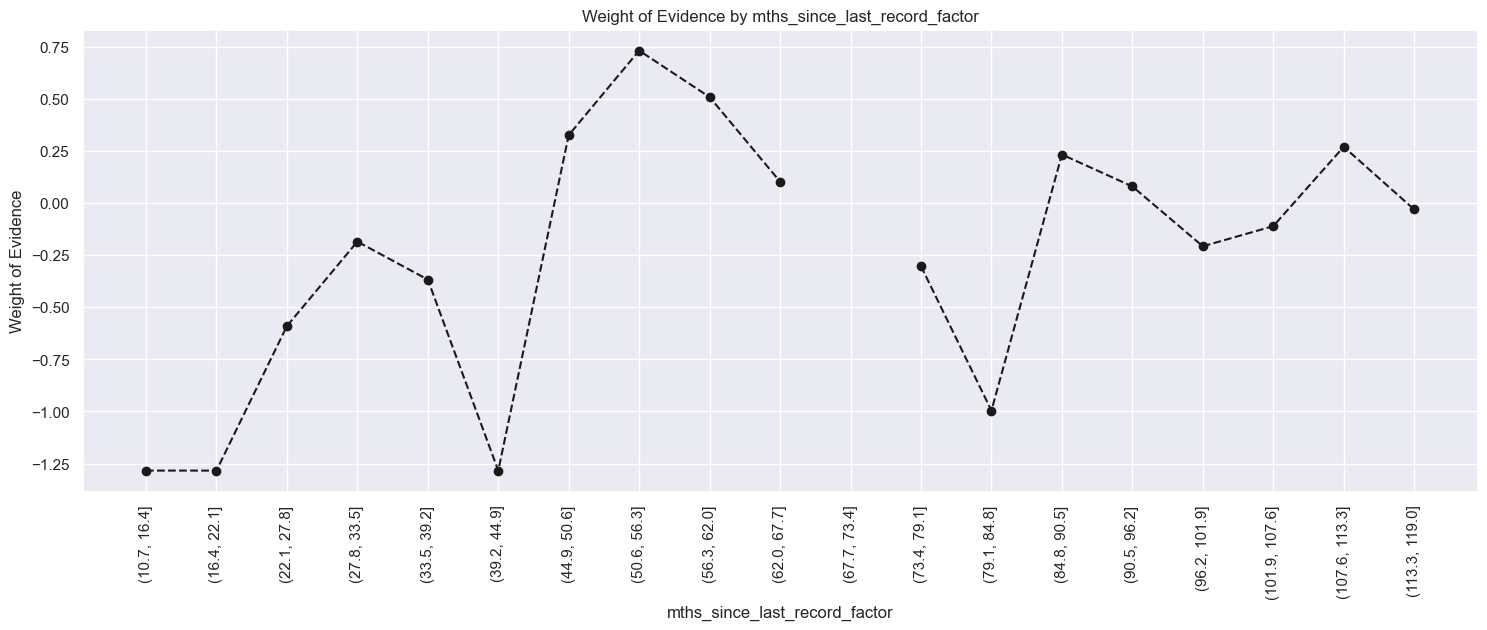

In [130]:
plot_by_woe(df_temp,90)

In [131]:
df_inputs_prep['mths_since_last_record_factor : Missing'] = np.where((df_inputs_prep['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prep['mths_since_last_record_factor : <4'] = np.where((df_inputs_prep['mths_since_last_record'] <= 4), 1, 0)
df_inputs_prep['mths_since_last_record_factor : 4-33'] = np.where((df_inputs_prep['mths_since_last_record'] > 4) & (df_inputs_prep['mths_since_last_record'] <= 33), 1, 0)
df_inputs_prep['mths_since_last_record_factor : 33-37'] = np.where((df_inputs_prep['mths_since_last_record'] > 20) & (df_inputs_prep['mths_since_last_record'] <= 37), 1, 0)
df_inputs_prep['mths_since_last_record_factor : 33-68'] = np.where((df_inputs_prep['mths_since_last_record'] > 33) & (df_inputs_prep['mths_since_last_record'] <= 68), 1, 0)
df_inputs_prep['mths_since_last_record_factor : 68-85'] = np.where((df_inputs_prep['mths_since_last_record'] > 68) & (df_inputs_prep['mths_since_last_record'] <= 85), 1, 0)
df_inputs_prep['mths_since_last_record_factor : 75-85'] = np.where((df_inputs_prep['mths_since_last_record'] > 75) & (df_inputs_prep['mths_since_last_record'] <= 85 ), 1, 0)
df_inputs_prep['mths_since_last_record_factor : >85'] = np.where((df_inputs_prep['mths_since_last_record'] > 85), 1, 0)

### Preprocessing Test Dataset

In [132]:
#loan_data_inputs_train = df_inputs_prep
loan_data_inputs_test = df_inputs_prep

#### Saving the train and test data to csv files

In [133]:
#loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
#loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')